# A1: Predicting Car Price

In this assignment, We need to predict the **selling price for a car** . Finally we also need to prepare a simple web-based car selling price prediction system for deployment.

## The provide raw data contais following features- 

- **name** : Brand name of the Car
- **Year** : Year of the car made
- **selling_price**: Selling price of the car
- **km_driven**: How many Killometers A car already run
- **fuel**: Type of fuel is used in car
- **seller_type**: Type of seller (Invididual, Dealer etc)
- **transmission**: Type of transmission of car ( Manual, Automatic)
- **owner**: How many owner already did purchase of a car
- **mileage**: Mileage of the car
- **engine**: Engine size
- **max_power**: The max power is available to a car
- **torque**:if an engine has a lot of torque, the car can accelerate more quickly.
- **seats**: Number of seats are availabe to a car

This raw dataset is required to be processed on given preporessing conditions


## Importing libraries

In [3]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.3', '1.5.3', '0.12.2', '3.7.2')

## 1. Load data

In [5]:
# Read the CSV file 'Cars - Cars.csv' and store it in a data frame called 'df'
df = pd.read_csv('data/Cars - Cars.csv')

In [6]:
# Display the first few rows of the DataFrame 'df' to get a quick overview of the data
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [7]:
# Get the dimensions of the DataFrame 'df' using the shape attribute
df.shape

(8128, 13)

In [8]:
# Generate descriptive statistics of the DataFrame 'df' using the describe() function
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
# Get the unique values in the 'owner' column of the DataFrame 'df'
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [11]:
# Create a mapping of unique owner categories to numerical values
category_mapping_owener = {category: index + 1 for index, category in enumerate(df['owner'].unique())}
# Apply the mapping to the 'owner' column and update it with encoded values
df['owner'] = df['owner'].map(category_mapping_owener)
print(category_mapping_owener)
df.head()

{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}


name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [12]:
#lambda function in somewhere later we need to check the owner category original value
get_key_by_value = lambda value: next((key for key, val in category_mapping_owener.items() if val == value), None)

In [13]:
# Get the unique values in the 'fuel' column of the DataFrame 'df'
df['fuel'].unique(), df.shape

(array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object), (8128, 13))

In [14]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
df = df.drop(df[df['fuel'].isin(['CNG', 'LPG'])].index)


In [15]:
# Check the unique values of the 'fuel' columns, and number of rows after dropping row with CNG and LGP
df['fuel'].unique(), df.shape

(array(['Diesel', 'Petrol'], dtype=object), (8033, 13))

In [16]:
# Display the first few rows of the 'mileage' column in the DataFrame 'df'
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [17]:
#For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float)
#Hint: usedf.mileage.str.split
# Split the 'Mileage' string and convert the numeric part to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Display the first few rows of the 'mileage' column in the DataFrame 'df' after modification
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [18]:
# Display the first few rows of the 'engine' column in the DataFrame 'df'
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [19]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [20]:
# Display the first few rows of the 'engine' column in the DataFrame 'df' after modification
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [21]:
# Display the first few rows of the 'max_power' column in the DataFrame 'df' 
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [22]:
#For the feature max_power, remove Text part and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [23]:
# Display the first few rows of the 'max_power' column in the DataFrame 'df' after modification
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [24]:
# Rename the 'name' column to 'brand'
df = df.rename(columns={'name':'brand'})

# Extract the first word from the 'brand' column for each row
df['brand'] = df['brand'].str.split().str[0]
# The 'brand' column now contains only the first word of each brand name

In [25]:
#Drop the feature torque,
df.drop('torque', axis=1,inplace=True)

In [26]:
# Display the first 12 rows of the DataFrame 'df'
df.head(12)

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0    Maruti  2014         450000     145500  Diesel  Individual       Manual   
1     Skoda  2014         370000     120000  Diesel  Individual       Manual   
2     Honda  2006         158000     140000  Petrol  Individual       Manual   
3   Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4    Maruti  2007         130000     120000  Petrol  Individual       Manual   
5   Hyundai  2017         440000      45000  Petrol  Individual       Manual   
7    Maruti  2001          45000       5000  Petrol  Individual       Manual   
8    Toyota  2011         350000      90000  Diesel  Individual       Manual   
9      Ford  2013         200000     169000  Diesel  Individual       Manual   
10  Renault  2014         500000      68000  Diesel  Individual       Manual   
11   Maruti  2005          92000     100000  Petrol  Individual       Manual   
12   Maruti  2009         280000     140000  Diesel  Individual       Manual   

    owner  mileage  engine  max_power  seats  
0       1    23.40  1248.0      74.00    5.0  
1       2    21.14  1498.0     103.52    5.0  
2       3    17.70  1497.0      78.00    5.0  
3       1    23.00  1396.0      90.00    5.0  
4       1    16.10  1298.0      88.20    5.0  
5       1    20.14  1197.0      81.86    5.0  
7       2    16.10   796.0      37.00    4.0  
8       1    23.59  1364.0      67.10    5.0  
9       1    20.00  1399.0      68.10    5.0  
10      2    19.01  1461.0     108.45    5.0  
11      2    17.30   993.0      60.00    5.0  
12      2    19.30  1248.0      73.90    5.0

In [27]:
# Display the column names of the DataFrame 'df'
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [28]:
# Get the unique values in the 'owner' column of the DataFrame 'df'
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [29]:
# Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
df = df.drop(df[df['owner'].isin([5])].index)

__Now Our data looks like that it satisies all the given requirements__

In [30]:
# Display the first few rows of the DataFrame 'df' after dropping rows
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [31]:
# Apply log transform to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price']) 

In [32]:
# Display the first few rows of the DataFrame 'df'
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014      13.017003     145500  Diesel  Individual       Manual   
1    Skoda  2014      12.821258     120000  Diesel  Individual       Manual   
2    Honda  2006      11.970350     140000  Petrol  Individual       Manual   
3  Hyundai  2010      12.323856     127000  Diesel  Individual       Manual   
4   Maruti  2007      11.775290     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [33]:
#copy the df.copy to further data processing & feature transformation
df_cp = df.copy()

In [34]:
# Display the first few rows of the DataFrame 'df_cp'
df_cp.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014      13.017003     145500  Diesel  Individual       Manual   
1    Skoda  2014      12.821258     120000  Diesel  Individual       Manual   
2    Honda  2006      11.970350     140000  Petrol  Individual       Manual   
3  Hyundai  2010      12.323856     127000  Diesel  Individual       Manual   
4   Maruti  2007      11.775290     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [35]:
df_cp['brand'].nunique()

32

## 2. EDA 

### EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [36]:
# Display information about the copied DataFrame 'df_cp', including data types and memory usage
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


### 2.1. Univariate analyis

Single variable exploratory data anlaysis

#### Categorical Variables Univariate Analysis

A **count plot** is a type of bar plot that is specifically used to visualize the frequency distribution of categorical data. It's particularly useful when we want to understand the distribution of categories within a single categorical variable. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

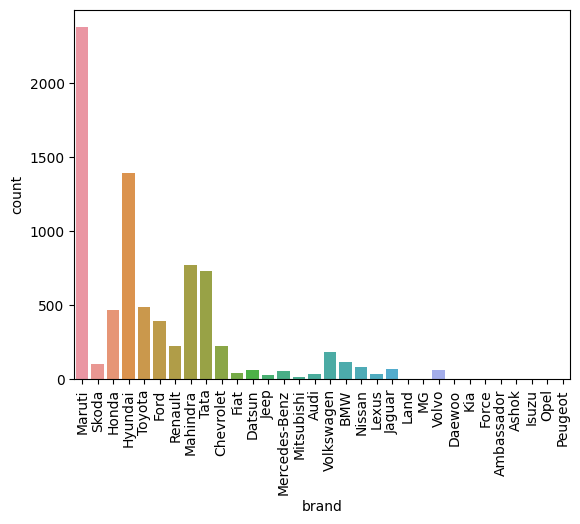

In [37]:
# Create a countplot to visualize the distribution of 'brand' column
sns.countplot(data = df, x ='brand')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

Since Car Name contains 32 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it.

In [38]:
df_cp.drop('brand', axis=1,inplace=True)

We're using the matplotlib and seaborn libraries to create subplots with countplots for other categorical column in the DataFrame df_cp. The loop iterates through the categorical columns, and for each column, a countplot is created. 

In [39]:
# List of categorical columns in the DataFrame other than 'brand'
categorical_cols = ['fuel','seller_type', 'transmission']

Text(0.5, 0.98, 'Frequency')

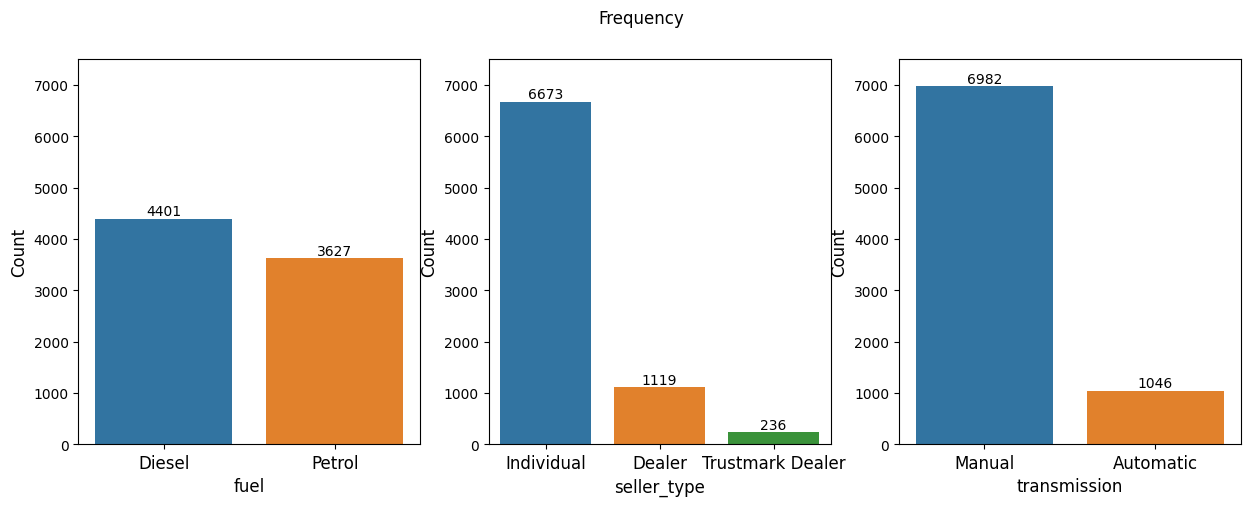

In [40]:
# Create a subplot layout with 1 row and 3 columns, set the figure size and dpi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
# Loop through the categorical columns for visualization
for i in range(len(categorical_cols)):
    #using countplot for visualizing the distribution of categorical data
    graph = sns.countplot(x= categorical_cols[i], data=df_cp, ax=ax[i])
    
    # Set labels and formatting for the subplot
    ax[i].set_xlabel(categorical_cols[i], fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,7500])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    # Add labels to the bars
    for cont in graph.containers:
        graph.bar_label(cont)
# Set a title for the overall visualization
plt.suptitle('Frequency')

- There are 2 fuel categories. Diesel has the highest frequency and Petrol has the least frequency.
- There are 2 seller_type categories. Individual has the highest frequency and Trustmark has the least frequency.
- There are 2 transmission categories. Manual has the highest frequency and Automatic has the least frequency.

### 2.2. Numerical Data Univariate Analysis

__Lineplot is commonly used to show trends, patterns, and changes in data over time or across a continuous variable.__

<Axes: xlabel='year', ylabel='selling_price'>

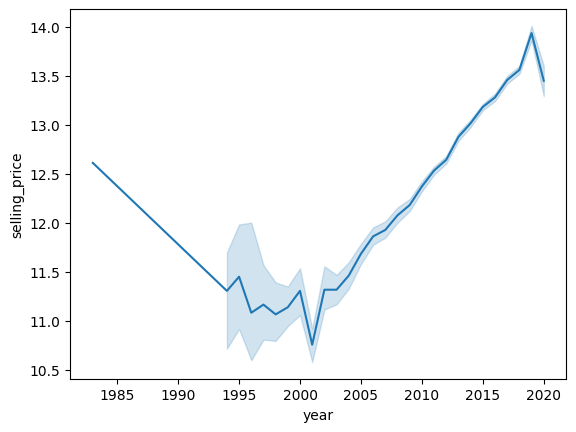

In [41]:
 sns.lineplot(x='year',y='selling_price',data=df,palette='tab20')

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year.

In [42]:
# Calculate and insert a new column 'age' based on the 'year' column
df_cp.insert(0, "age", df_cp["year"].max()+1-df_cp["year"])
# Drop the 'year' column from the DataFrame
df_cp.drop('year', axis=1, inplace=True)

In [43]:
# Define the numerical columns to visualize other than 'year'
numerical_cols = ['age', 'km_driven', 'owner','mileage','engine', 'seats','max_power', 'selling_price']

#### Distribution plot

__sns.displot is a function in Seaborn used to create distribution plots, particularly for univariate data. It's primarily used to visualize the distribution of a single variable and provides various options for displaying data like histograms, kernel density estimates, and more. displot is versatile and can be useful in a range of scenarios__

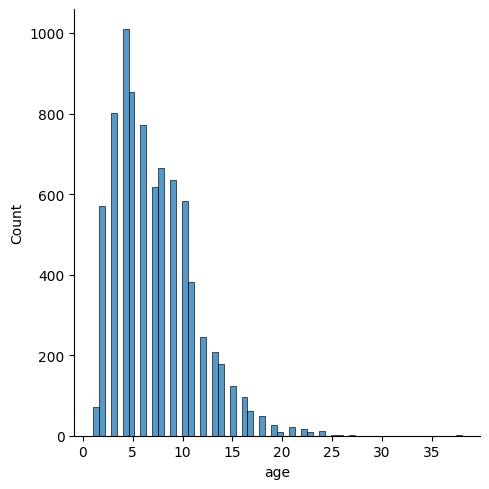

In [44]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'age'
sns.displot(data = df_cp, x = numerical_cols[0])

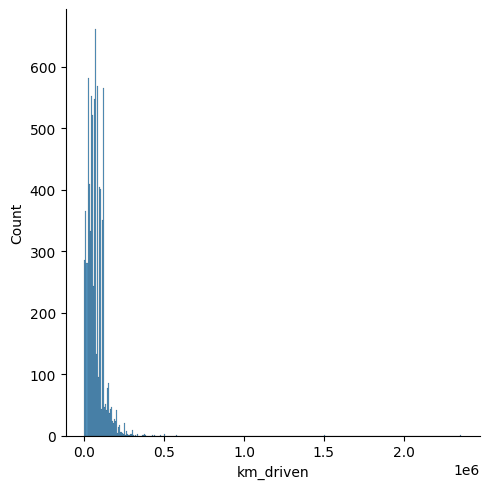

In [45]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'km_driven'
sns.displot(data = df_cp, x = numerical_cols[1])

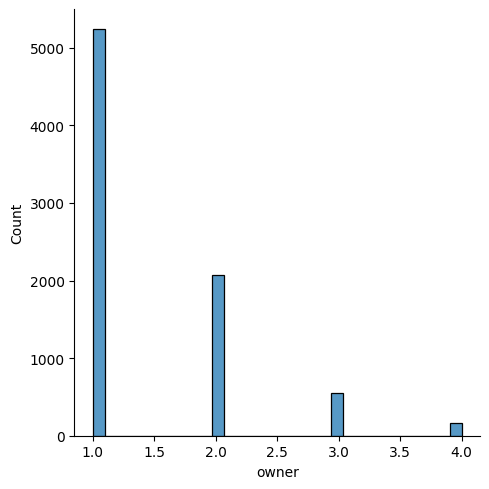

In [46]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'owner'
sns.displot(data = df_cp, x = numerical_cols[2])

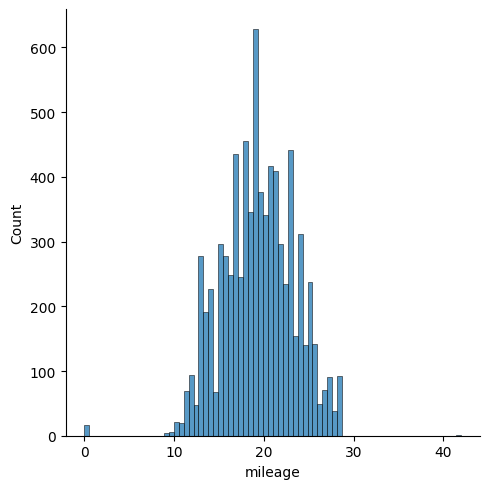

In [47]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'mileage'
sns.displot(data = df_cp, x = numerical_cols[3])

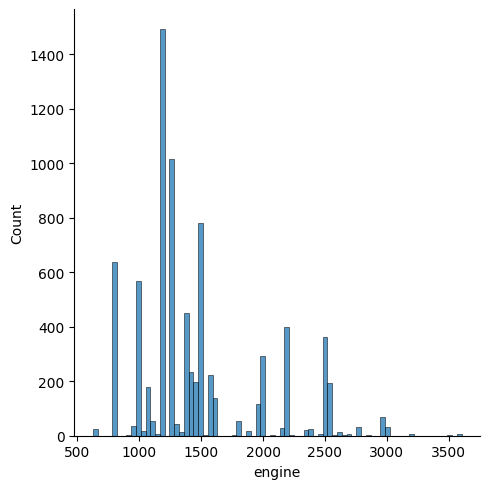

In [48]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'engine'
sns.displot(data = df_cp, x = numerical_cols[4])

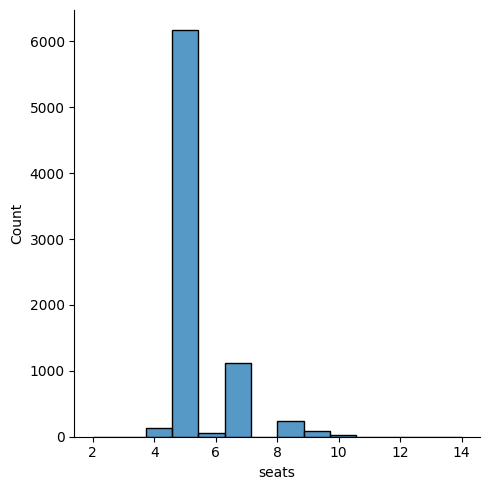

In [49]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'seats'
sns.displot(data = df_cp, x = numerical_cols[5])

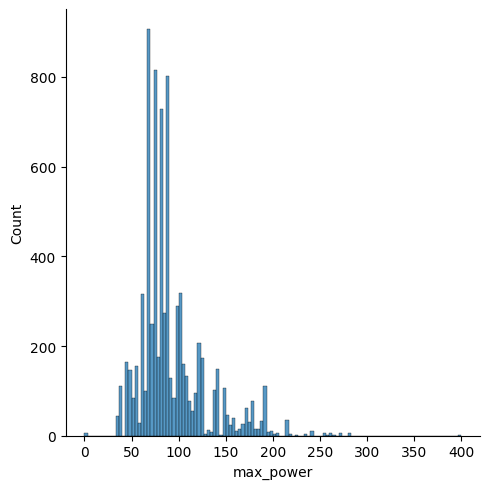

In [50]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'max_power'
sns.displot(data = df_cp, x = numerical_cols[6])

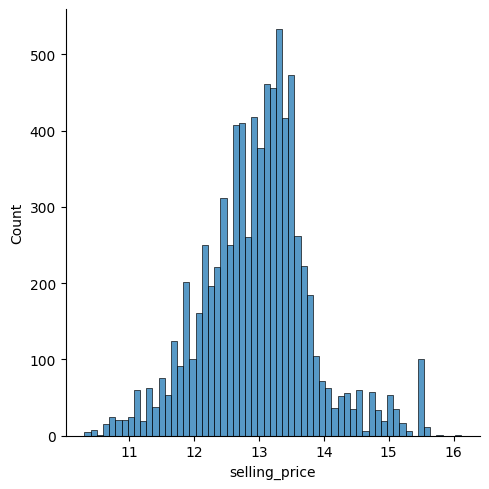

In [51]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'selling_price'
sns.displot(data = df_cp, x = numerical_cols[7])

 Histograms and bin edges are used in data visualization to represent the distribution of numerical data.
- A histogram is a graphical representation of the distribution of a dataset. It groups the data into "bins" or intervals and displays the frequency or count of data points that fall within each bin. 
- Bin edges are the boundaries that define the intervals for grouping data in a histogram.




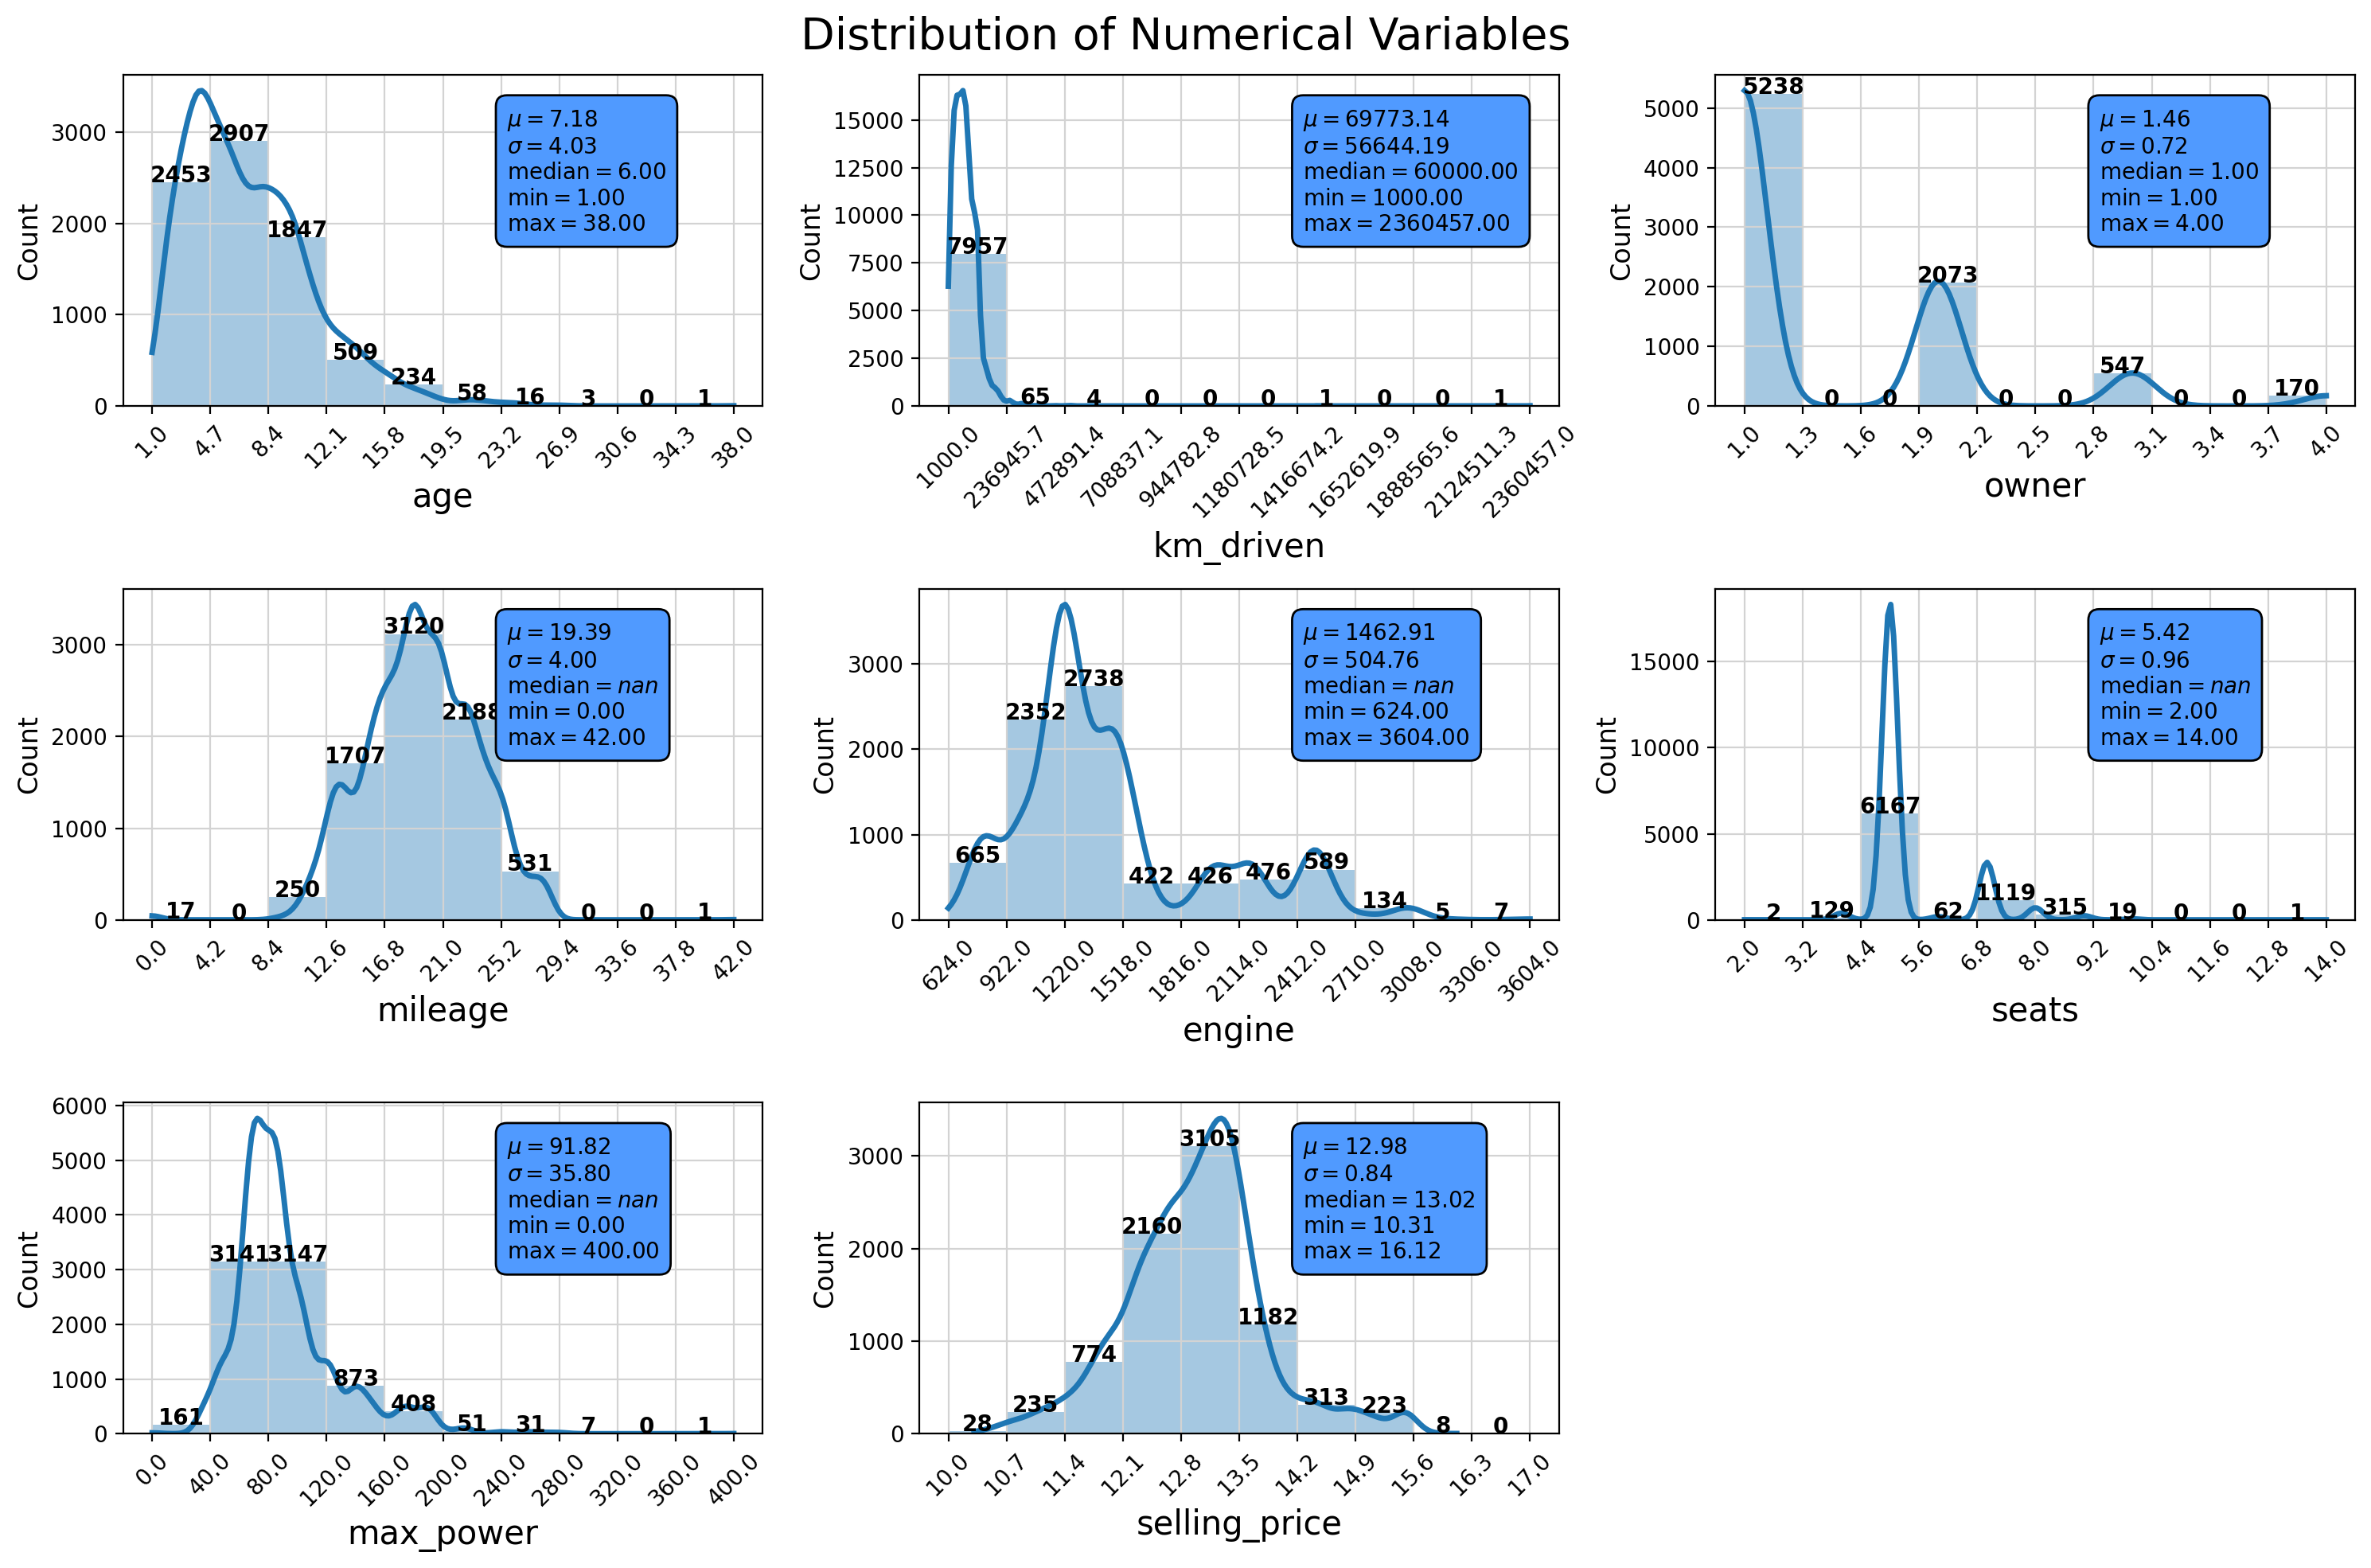

In [52]:
# Create subplots for distribution of numerical variables
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), dpi=200)

# Iterate through numerical columns and create histograms
for i in range(len(numerical_cols)):

    # Calculate row and column indices for subplot placement
    row = i // 3
    col = i % 3

    # Calculate histogram values and bin edges
    values, bin_edges = np.histogram(df_cp[numerical_cols[i]],
                                     range=(np.floor(df_cp[numerical_cols[i]].min()), np.ceil(df_cp[numerical_cols[i]].max())))
    
    # Create histogram with KDE plot Kernel Density Estimation (KDE) is a non-parametric technique used in statistics to estimate the probability density function (PDF) 
    # of a continuous random variable. It provides a smoothed representation of the underlying distribution of data points.
    graph = sns.histplot(data=df_cp, x=numerical_cols[i], bins=bin_edges, kde=True, ax=ax[row, col],
                         edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})

    # Set labels, ticks, and grid for the subplot
    ax[row, col].set_xlabel(numerical_cols[i], fontsize=15)
    ax[row, col].set_ylabel('Count', fontsize=12)
    ax[row, col].set_xticks(np.round(bin_edges, 1))
    ax[row, col].set_xticklabels(ax[row, col].get_xticks(), rotation=45)
    ax[row, col].grid(color='lightgrey')

    # Annotate bars with count values
    for j, p in enumerate(graph.patches):
        ax[row, col].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                              ha='center', fontsize=10, fontweight="bold")
    

    # Add summary statistics text box

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_cp[numerical_cols[i]].mean(),
        r'$\sigma=%.2f$' % df_cp[numerical_cols[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df_cp[numerical_cols[i]]),
        r'$\mathrm{min}=%.2f$' % df_cp[numerical_cols[i]].min(),
        r'$\mathrm{max}=%.2f$' % df_cp[numerical_cols[i]].max()
    ))
    ax[row, col].text(0.6, 0.9, textstr, transform=ax[row, col].transAxes, fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='#509aff', edgecolor='black', pad=0.5))

# Hide empty subplot
ax[2, 2].axis('off')

# Set title, adjust layout, and display the plot
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()
#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

### 2.3. Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Box plots are great for comparing the distribution of a numeric variable across different categories 

- They display the median, quartiles, and possible outliers in a clear and compact manner.
- The x parameter specifies the categorical variable
- The y parameter specifies the numerical variable 

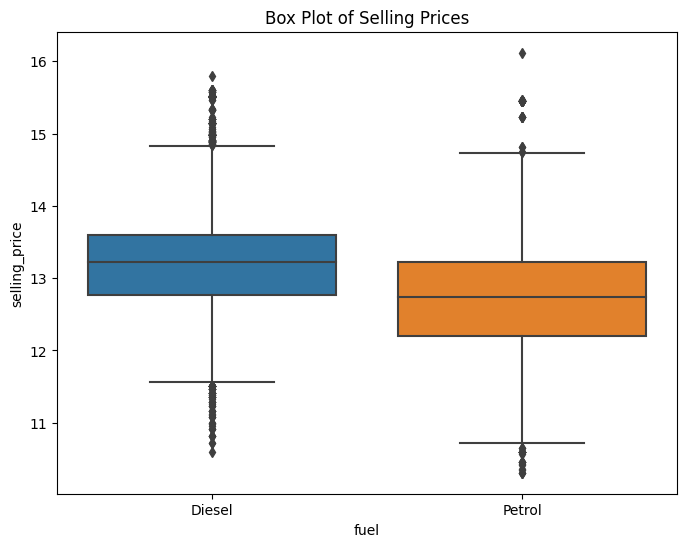

In [53]:
# Create a box plot to visualize the distribution of selling price against fuel
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cp, x=categorical_cols[0], y=numerical_cols[-1])
plt.title("Box Plot of Selling Prices")
plt.show()

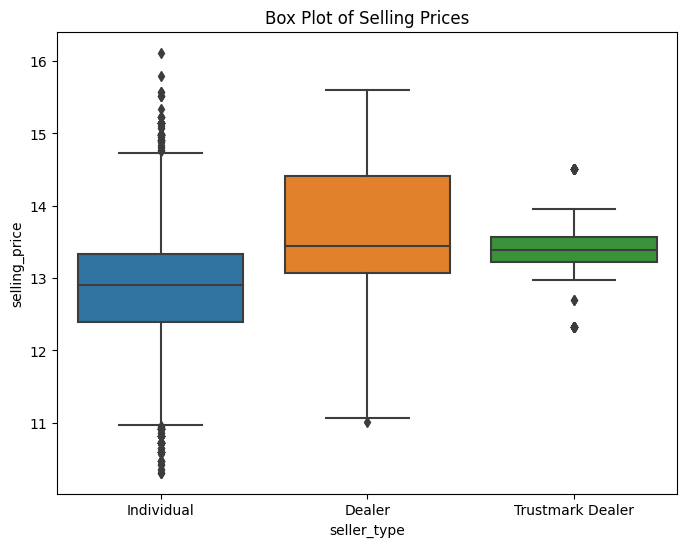

In [54]:
# Create a box plot to visualize the distribution of selling price against seller type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cp, x=categorical_cols[1], y=numerical_cols[-1])
plt.title("Box Plot of Selling Prices")
plt.show()

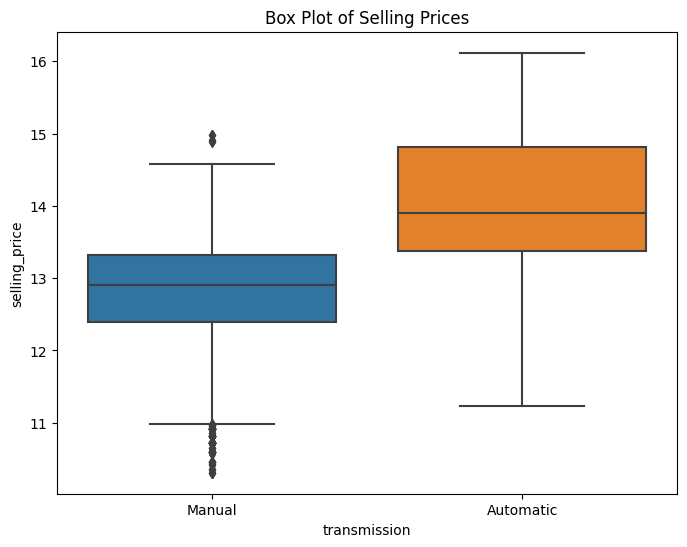

In [55]:
# Create a box plot to visualize the distribution of selling price against transmission
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cp, x=categorical_cols[2], y=numerical_cols[-1])
plt.title("Box Plot of Selling Prices")
plt.show()

#### Scatterplot

__The scatter plot visualizes how the two numerical variable are varied with each other while color-coding the points based on the different categories__

<Axes: xlabel='age', ylabel='selling_price'>

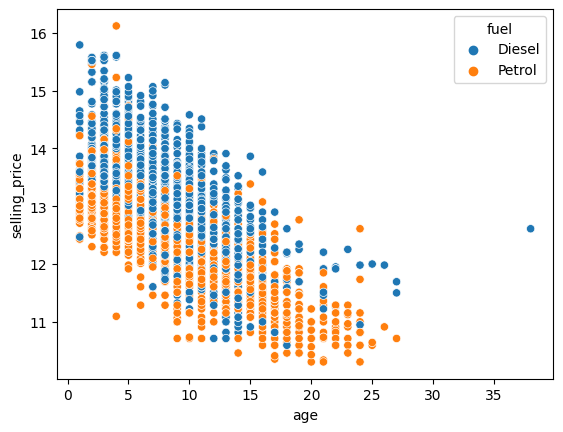

In [56]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age' , 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])


<Axes: xlabel='age', ylabel='selling_price'>

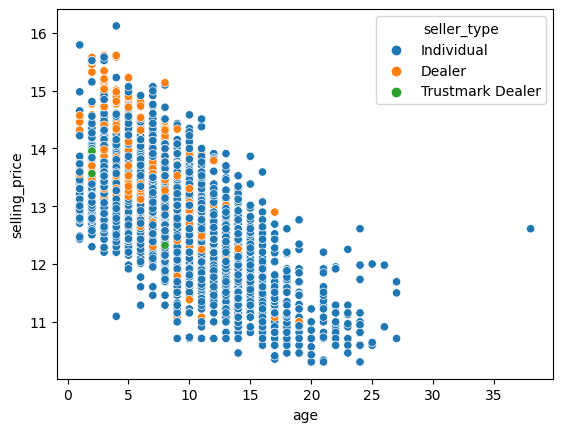

In [57]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='age', ylabel='selling_price'>

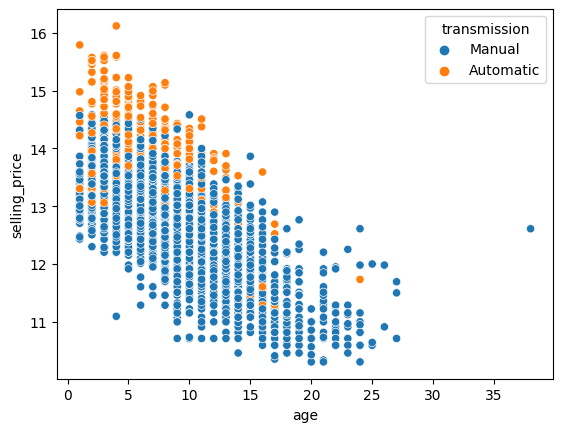

In [58]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='owner', ylabel='selling_price'>

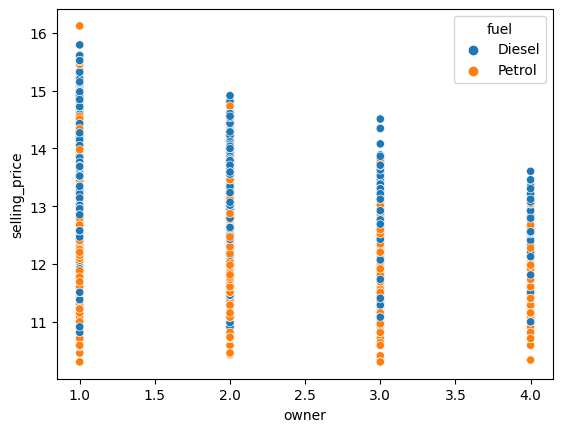

In [59]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

<Axes: xlabel='owner', ylabel='selling_price'>

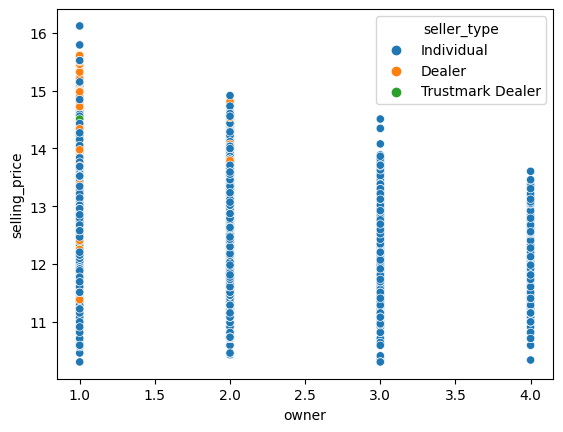

In [60]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='owner', ylabel='selling_price'>

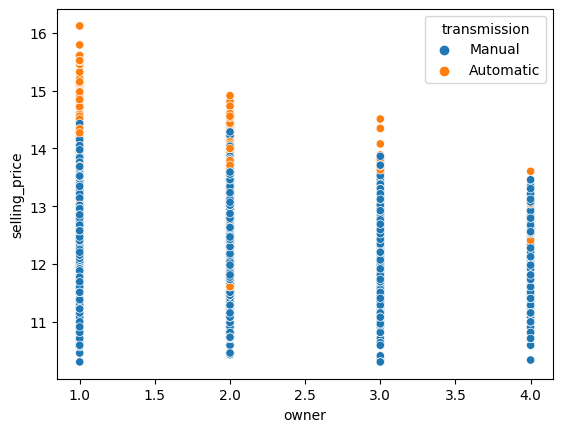

In [61]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

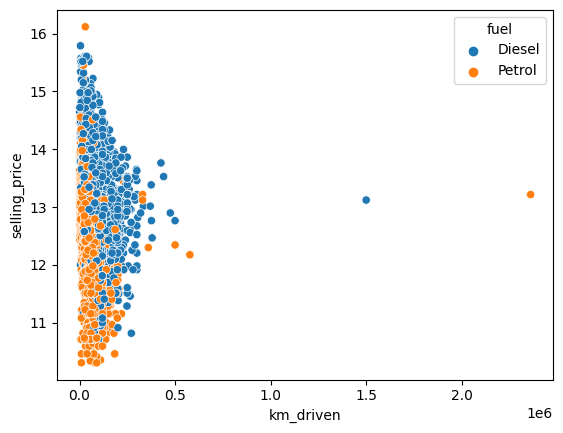

In [62]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

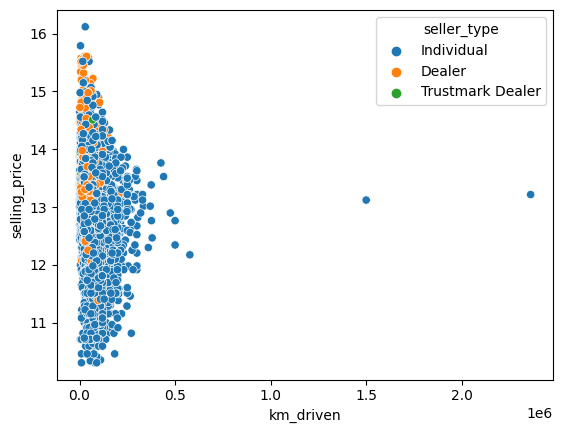

In [63]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

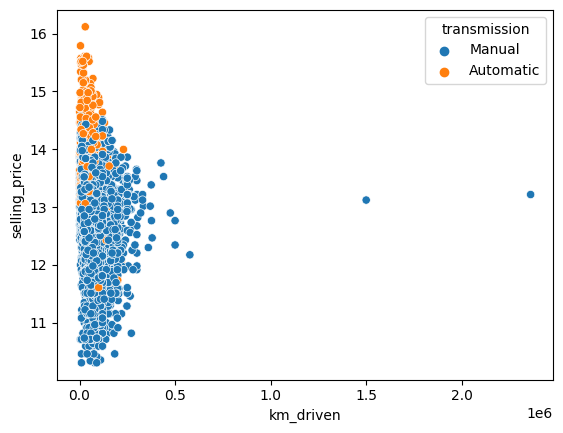

In [64]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='mileage', ylabel='selling_price'>

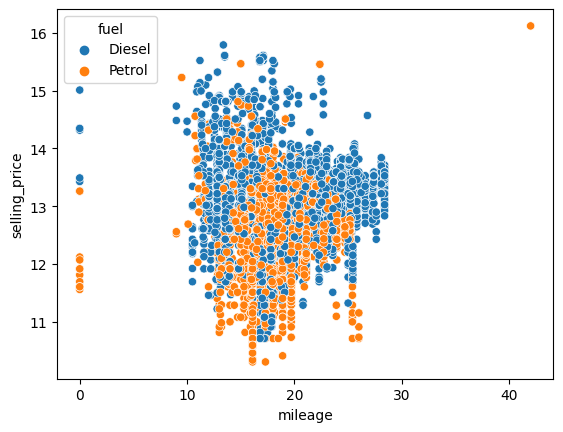

In [65]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'mileage', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot( x = df_cp[numerical_cols[3]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

__To visualize all the possible pairs of numerical variable's relation with respect to each categorical variable, lets use matplotlib subploting, it will be time saving and help to concentrate more on data.__

In [66]:
#Function to call for all the numerical feature to show the relation by subploting with scatterplot
#for details https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
def do_scatterplot(numerical_feature, target, hue_label, nrows = 3, ncols = 3):
    # Create subplots layout with the specified number of rows and columns
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,12), dpi=200)

    # Loop through numerical features and create scatterplots with the target variable
    for i in range(len(numerical_feature)):
        x=i//3
        y=i%3
        # Create scatterplot using Seaborn's scatterplot function
        sns.scatterplot(data=df_cp, x=numerical_feature[i], y=target, hue=hue_label, ax=ax[x,y])

        # Set title, x-axis label, y-axis label, and grid for the subplot
        ax[x,y].set_title('{} vs. {}'.format(target, numerical_feature[i]), size = 15)
        ax[x,y].set_xlabel(numerical_feature[i], size = 12)
        ax[x,y].set_ylabel(target, size = 12)
        ax[x,y].grid()

    # Hide the subplots in the last row
    ax[2, 1].axis('off')
    ax[2, 2].axis('off')
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

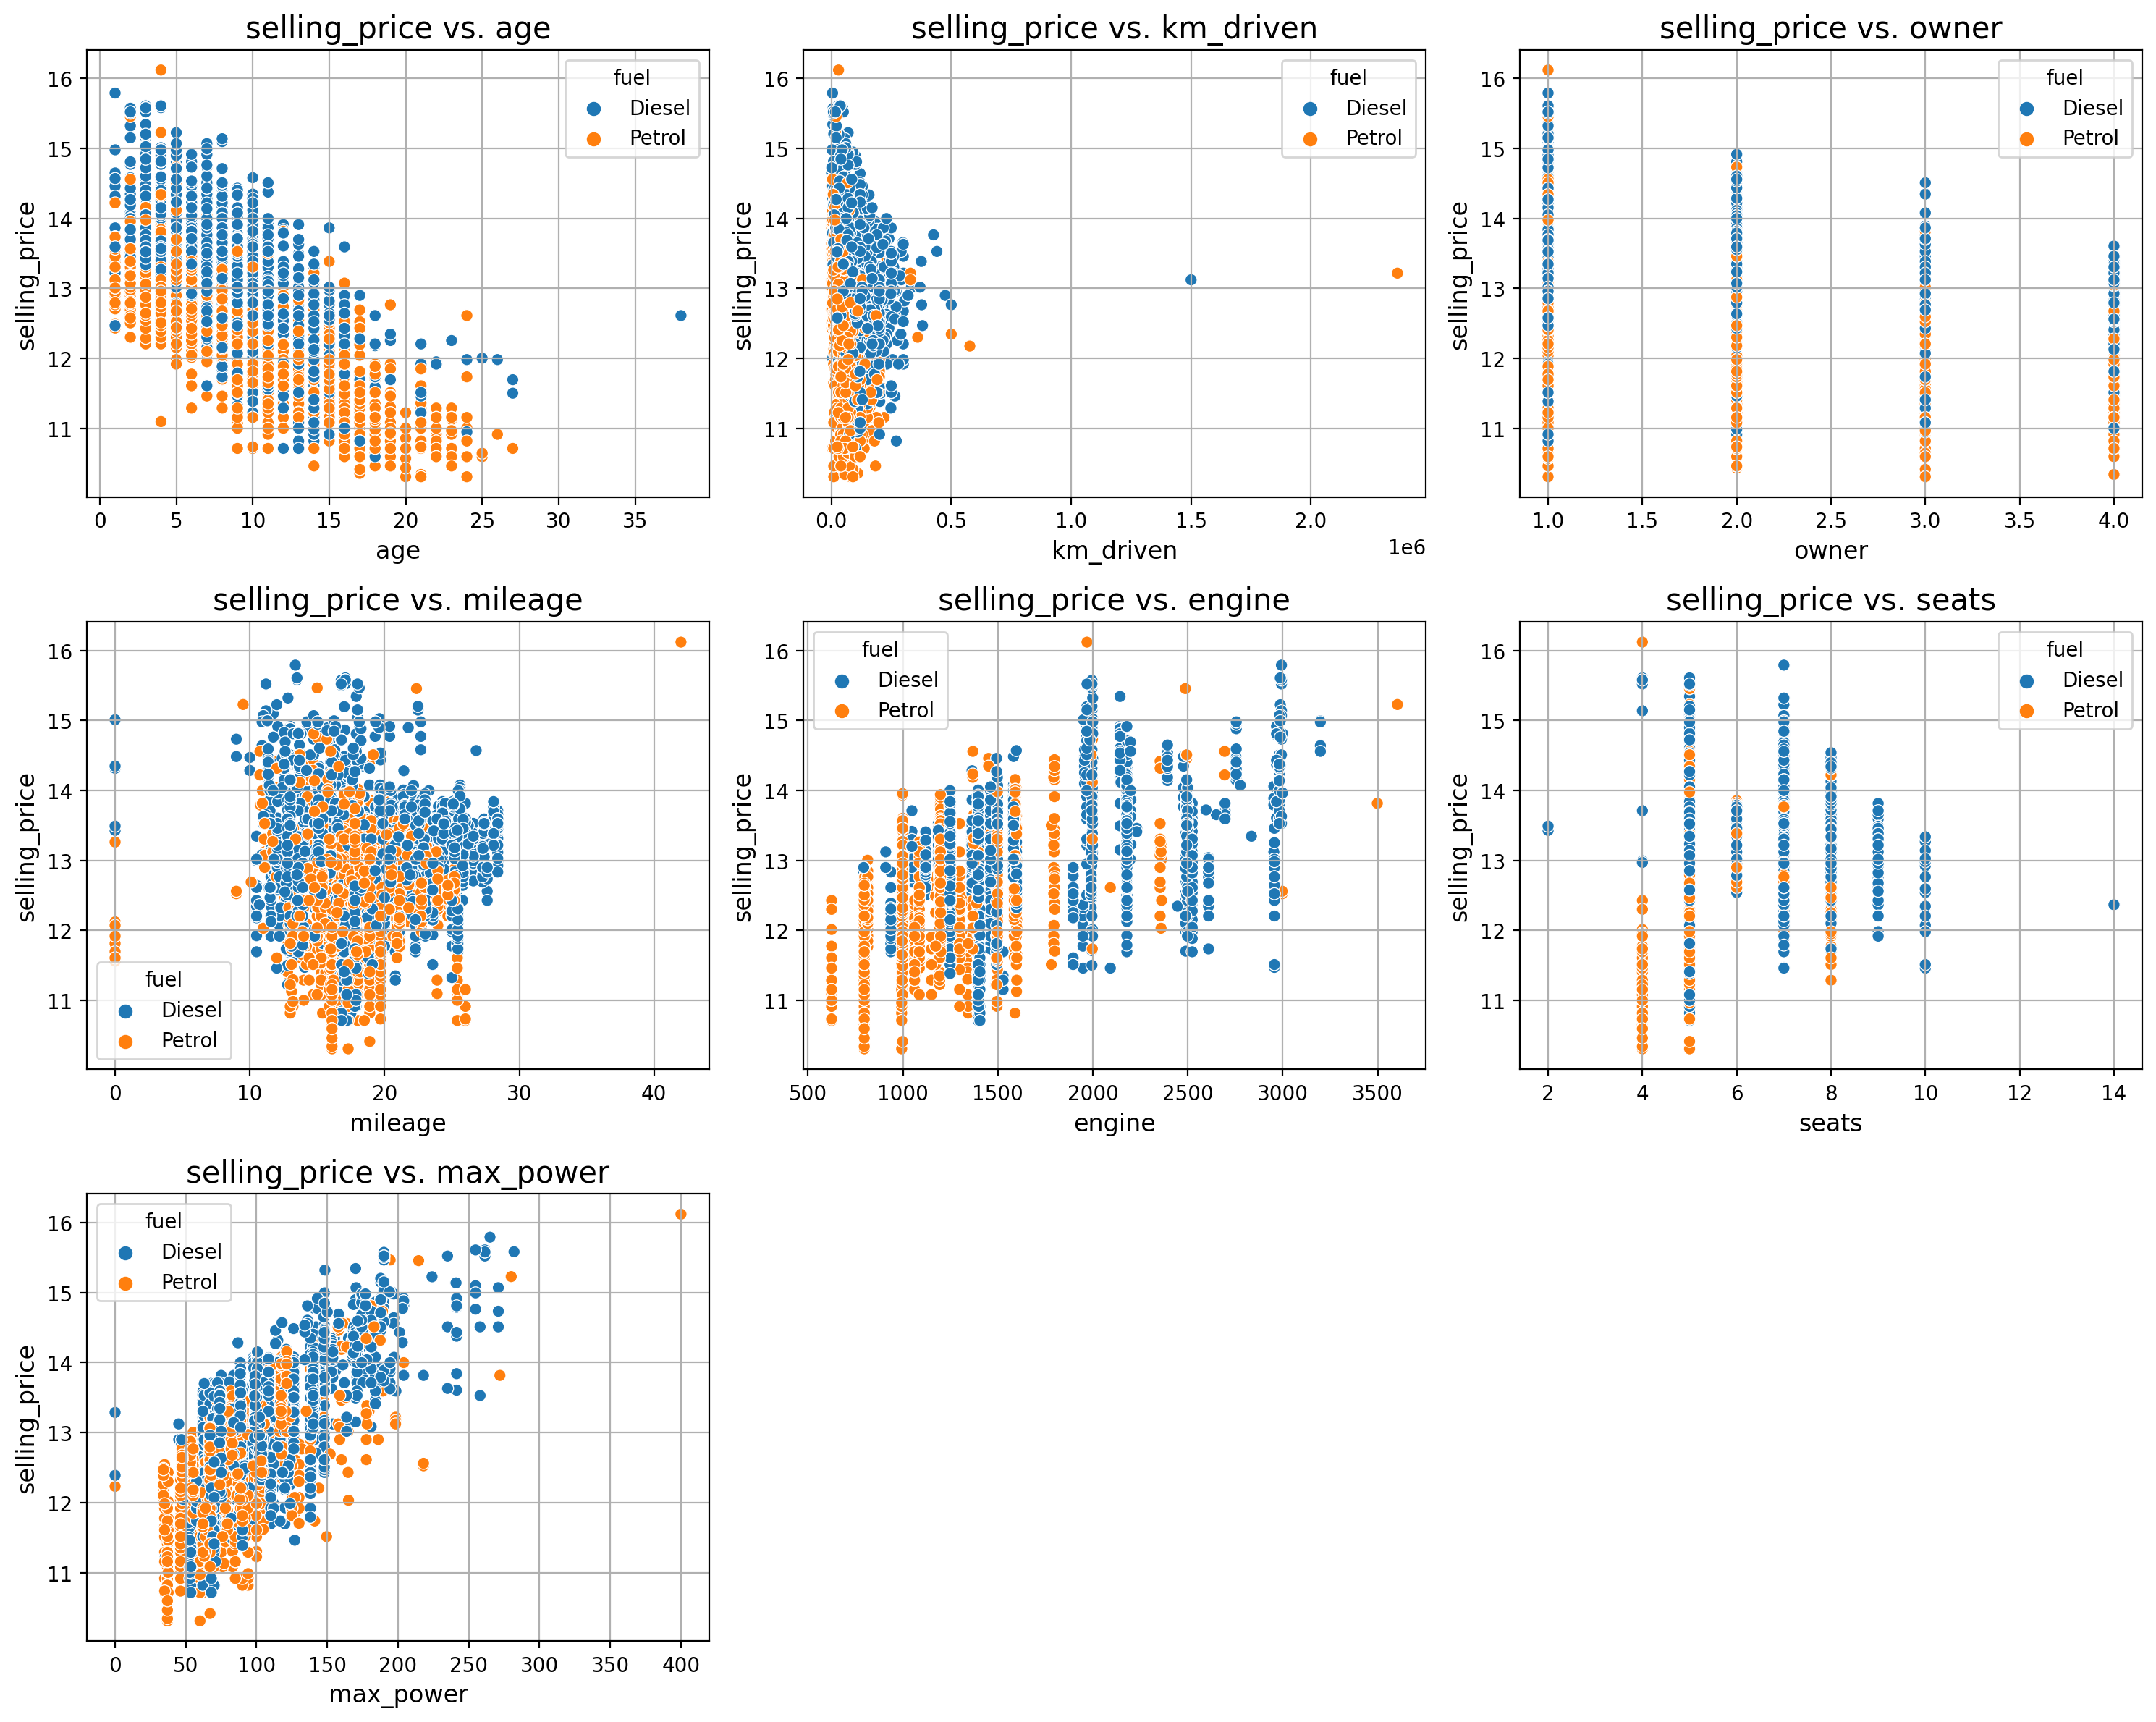

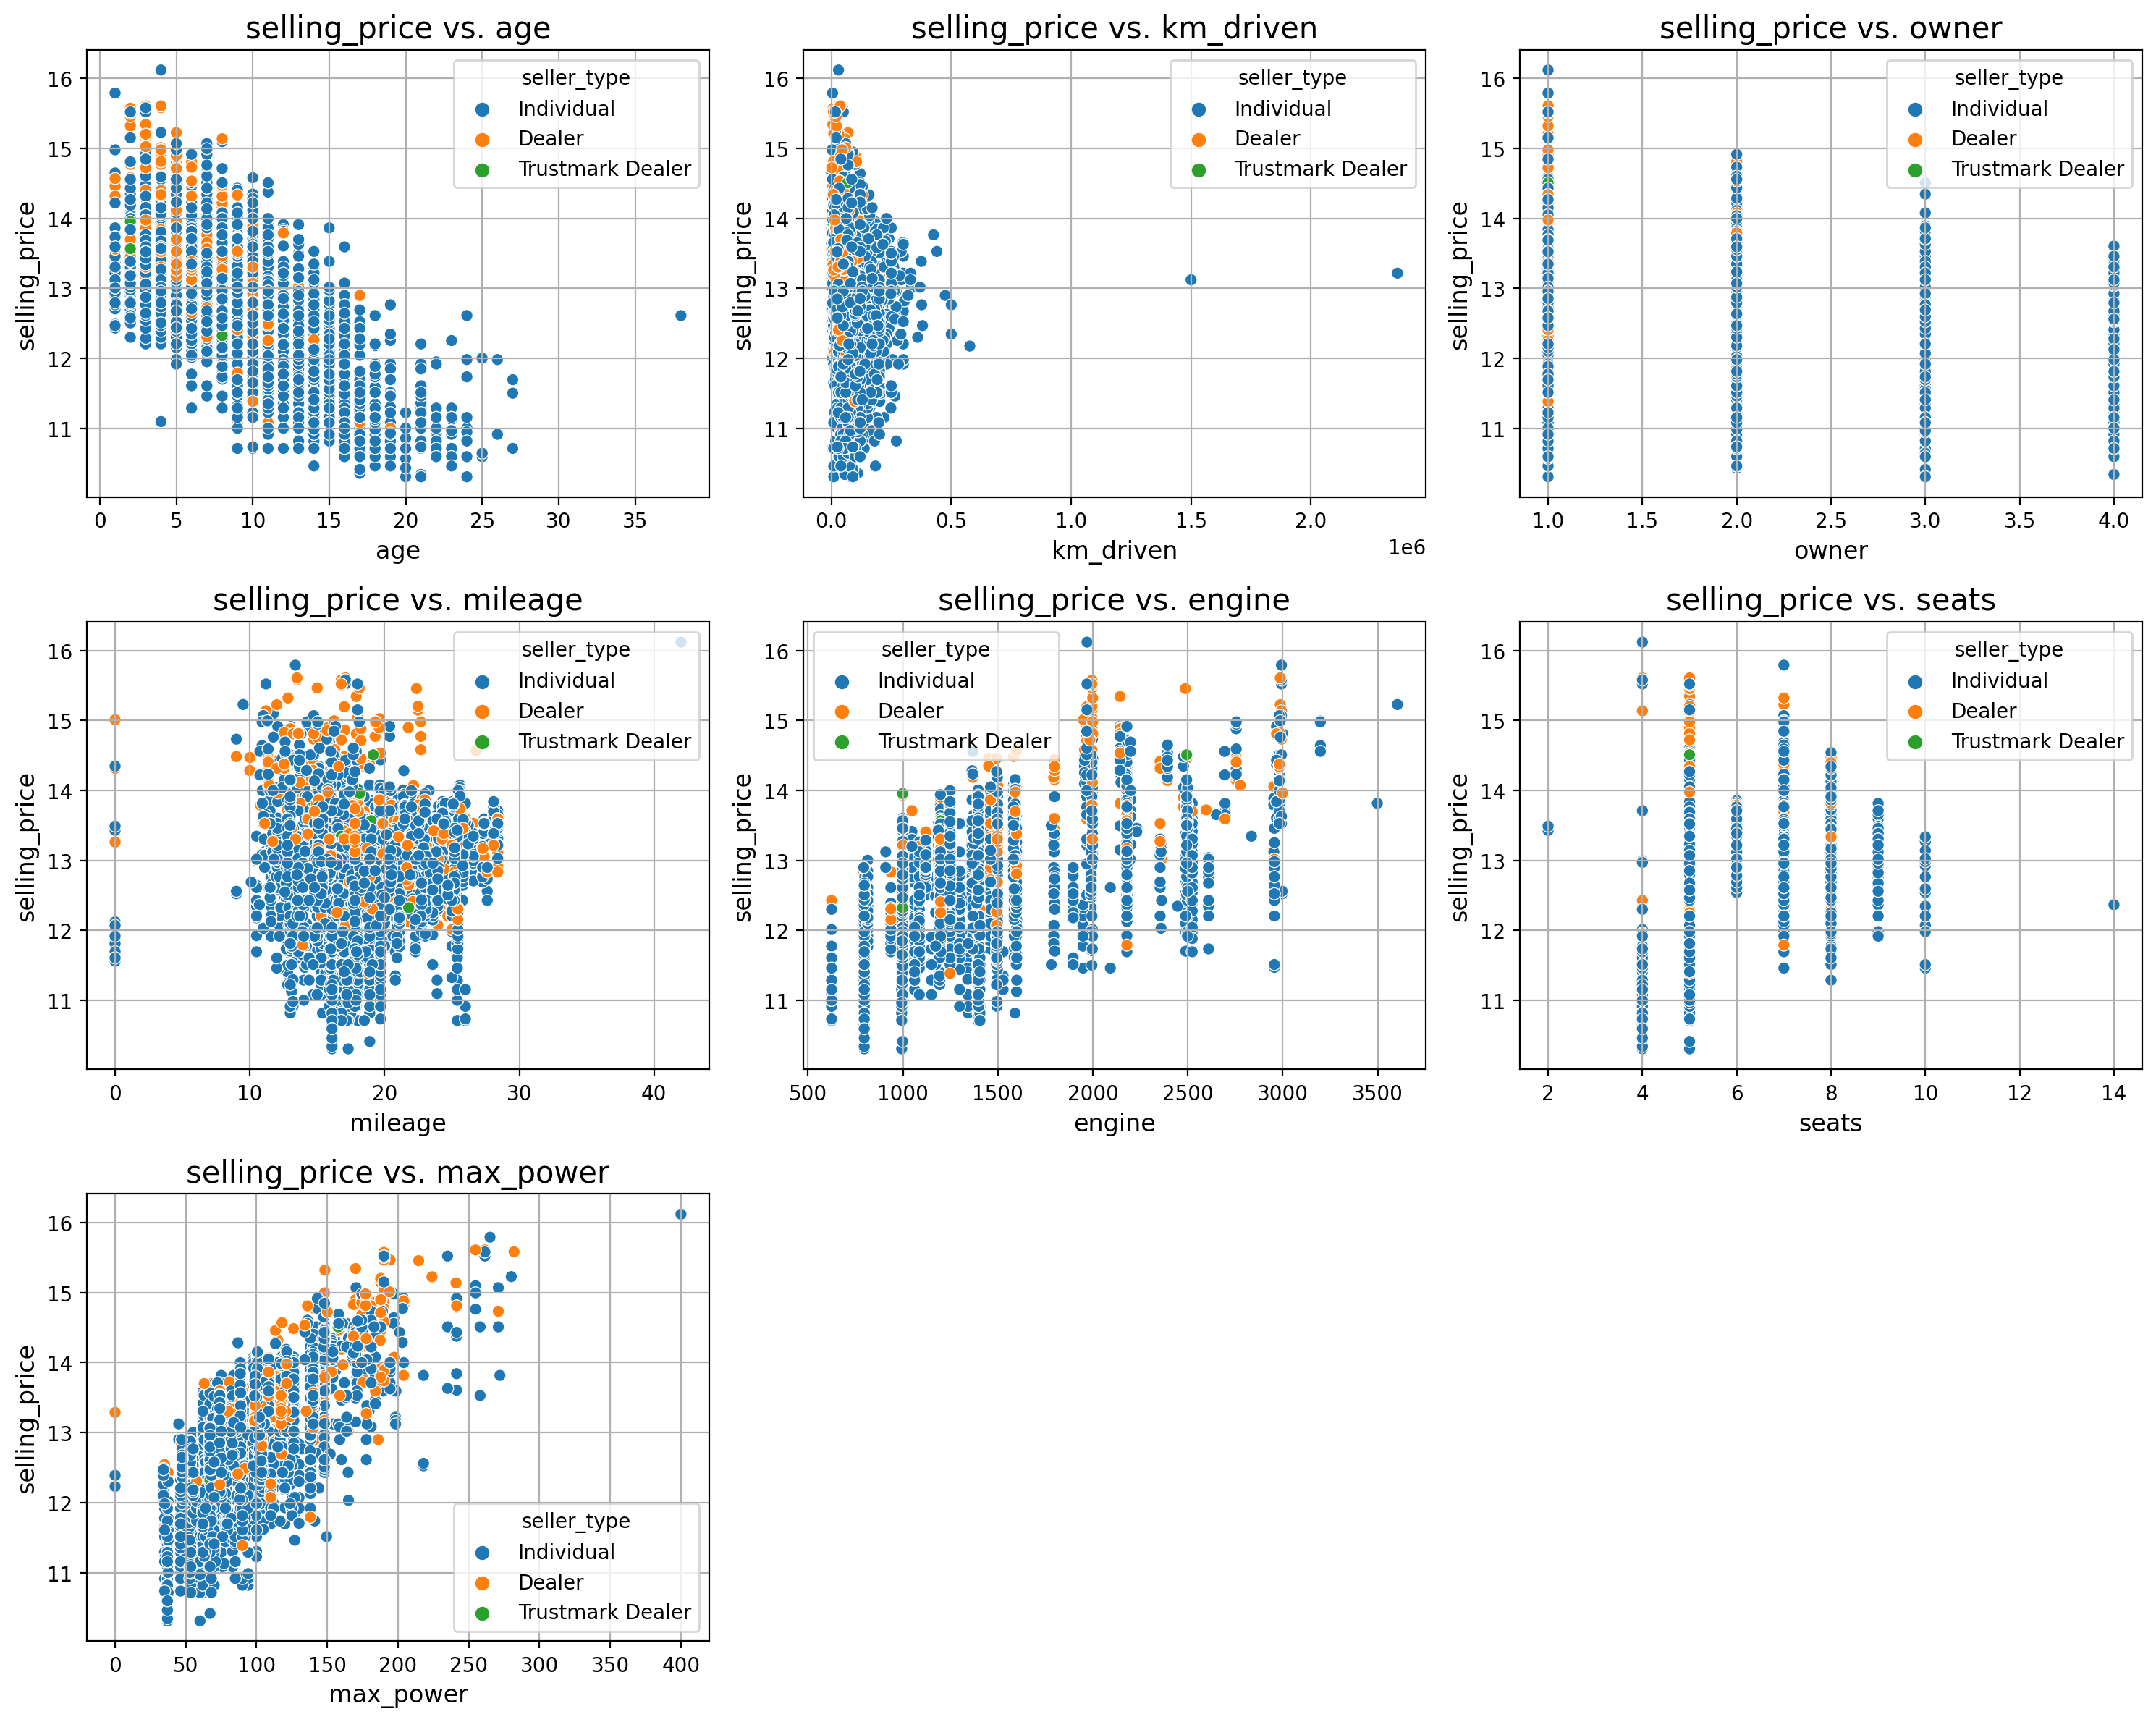

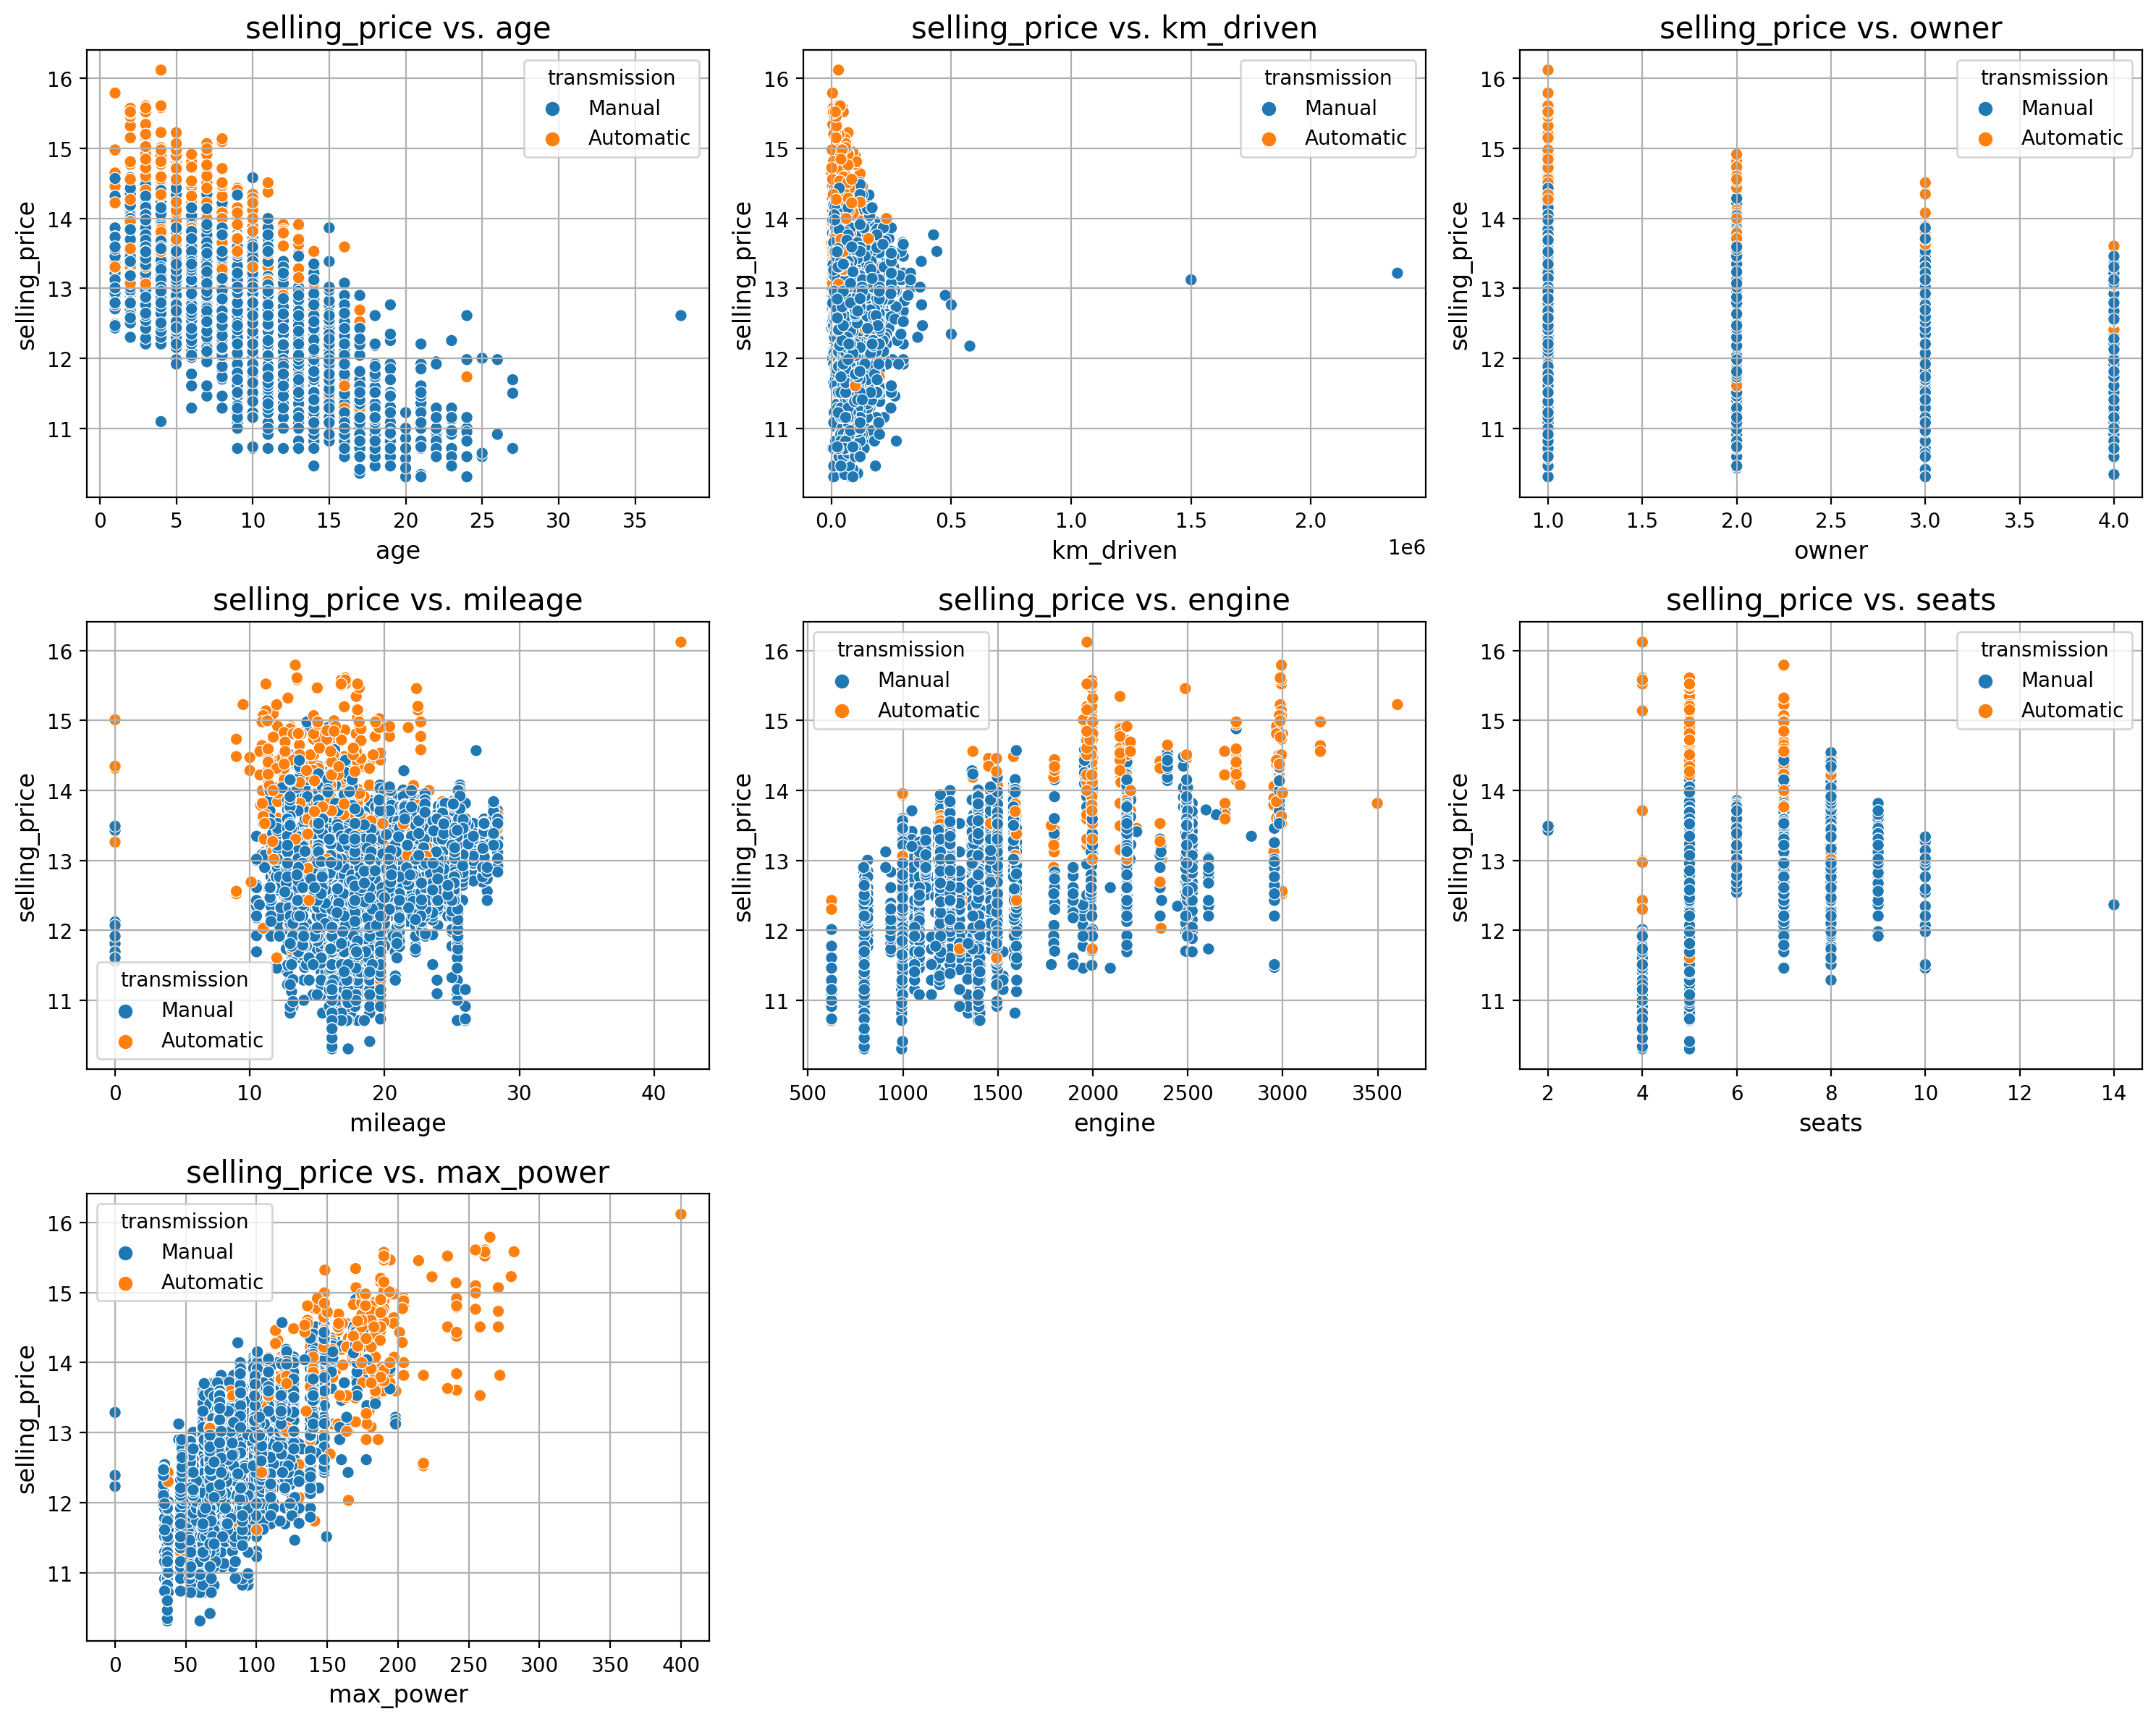

In [67]:
#send all the numberical variables as feature and the seller_price as target , while categorical variable as color coding(hue)
for cat_col in categorical_cols:
    do_scatterplot(numerical_cols[:-1],numerical_cols[-1], cat_col,3,3)

#### Key finding of EDA

#####  selling_price vs numerical feature analysis
- As the car ages, its selling_price decreases. So selling_price is inversely proportional to the age of the car.

- As the car's Km_driven increases, its selling_price decreases. So selling_price is inversely proportional to Km_driven.

- As the number of previous car owners increases, its selling_price decreases. So Selling_Price is inversely proportional to Owner.

- As the number of  car size increases, its selling_price also increases. So Selling_Price is proportional to engine size.

- As the number of  max_power increases, its selling_price also increases. So Selling_Price is proportional to max_power.

##### selling_price vs categorical feature analysis 
- Diesel Cars > Petrol Cars in terms of selling_price.
- The selling_price of cars sold by individuals is lower than the price of cars sold by dealers.
- Automatic cars are more expensive than manual cars.


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling_price.
It's also for checking whether certain features are too correlated.


Let's Check the correlation before the encoding of the categorical variables

In [68]:
df_cp.corr()

age  selling_price  km_driven     owner   mileage  \
age            1.000000      -0.712151   0.417761  0.513135 -0.328817   
selling_price -0.712151       1.000000  -0.250714 -0.400123 -0.033074   
km_driven      0.417761      -0.250714   1.000000  0.290474 -0.173733   
owner          0.513135      -0.400123   0.290474  1.000000 -0.174818   
mileage       -0.328817      -0.033074  -0.173733 -0.174818  1.000000   
engine        -0.016725       0.516000   0.209019  0.007559 -0.578707   
max_power     -0.226345       0.729258  -0.036235 -0.110228 -0.372881   
seats          0.007718       0.187066   0.228646  0.030173 -0.454411   

                 engine  max_power     seats  
age           -0.016725  -0.226345  0.007718  
selling_price  0.516000   0.729258  0.187066  
km_driven      0.209019  -0.036235  0.228646  
owner          0.007559  -0.110228  0.030173  
mileage       -0.578707  -0.372881 -0.454411  
engine         1.000000   0.701834  0.610481  
max_power      0.701834   1.000000  0.189248  
seats          0.610481   0.189248  1.000000

<Axes: >

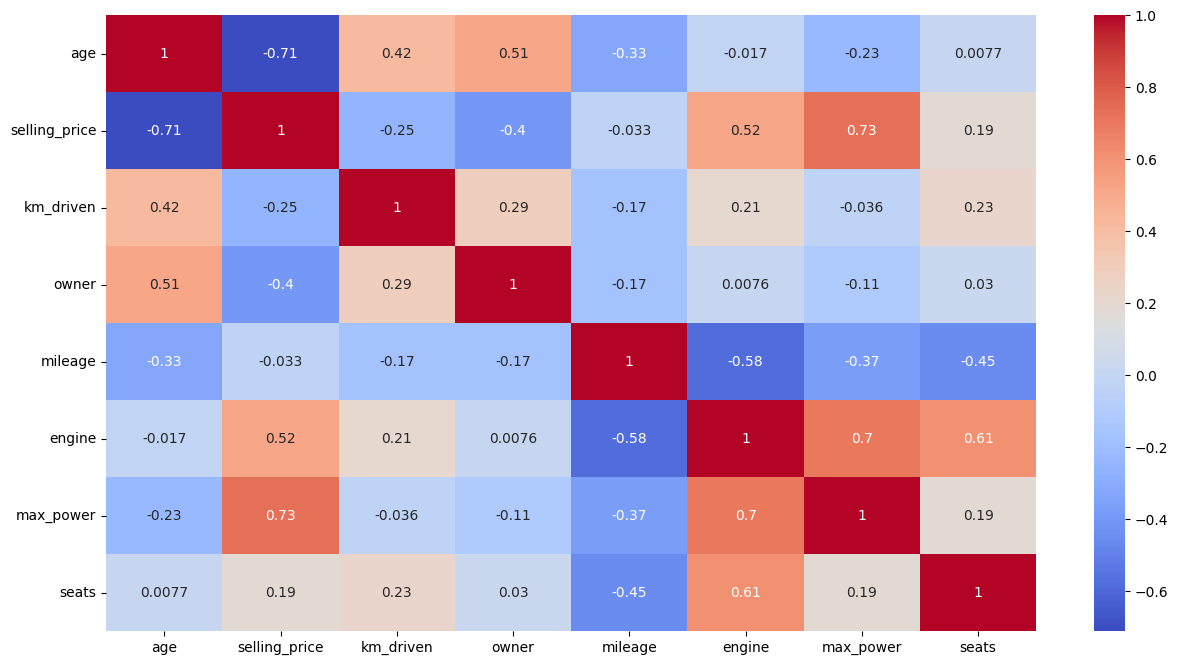

In [69]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df_cp.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

### Negative Correlations:
- 'age': There is a slight higher than moderate negative correlation between the age of the car and its selling price. As the car gets older, its selling price tends to decrease.
- 'km_driven': There is a weak negative correlation between the distance driven (km) and the selling price. Generally, cars with higher km_driven tend to have lower selling prices.
- 'owner': There is a moderate negative correlation between the number of previous owners and the selling price. Cars with more owners tend to have lower selling prices.
- 'mileage': There is a weak negative correlation between mileage and selling price. Cars with higher mileage tend to have slightly lower selling prices.
### Positive Correlations:
- 'engine': There is a moderate positive correlation between the engine's displacement and the selling price. Cars with larger engines tend to have higher selling prices.
- 'max_power': There is a strong positive correlation between the maximum power of the car and its selling price. More powerful cars tend to have higher selling prices.
- 'seats': There is a weak positive correlation between the number of seats and the selling price. Cars with more seats might have slightly higher selling prices.

__Lets see the individual correlation using regplot. Usually regplot function is used to create a scatter plot with a regression line, which helps in visualizing the relationship between two continuous variables.__

<Axes: xlabel='age', ylabel='selling_price'>

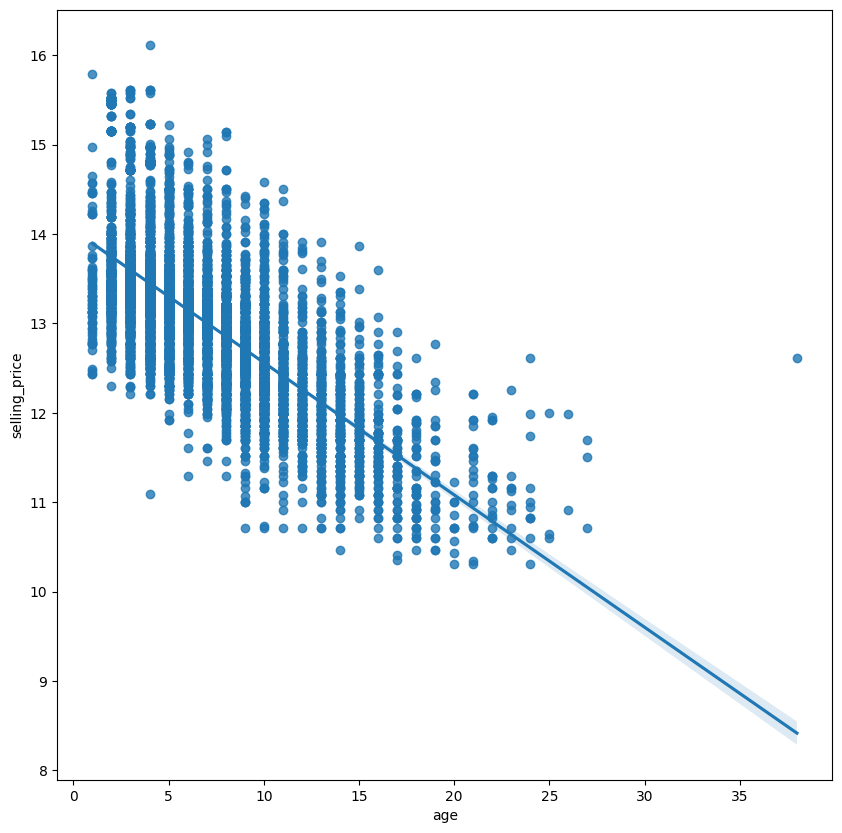

In [70]:
# Create a regplot with a regression line to visualize the relationship between 'age' and 'selling_price'
plt.figure(figsize=(10,10))
sns.regplot(x='age',y='selling_price',data=df_cp) 

_Similar to what we found earlier, here it shows as the age of the car increases the selling price goes down, Depreciation of assest_

<Axes: xlabel='km_driven', ylabel='selling_price'>

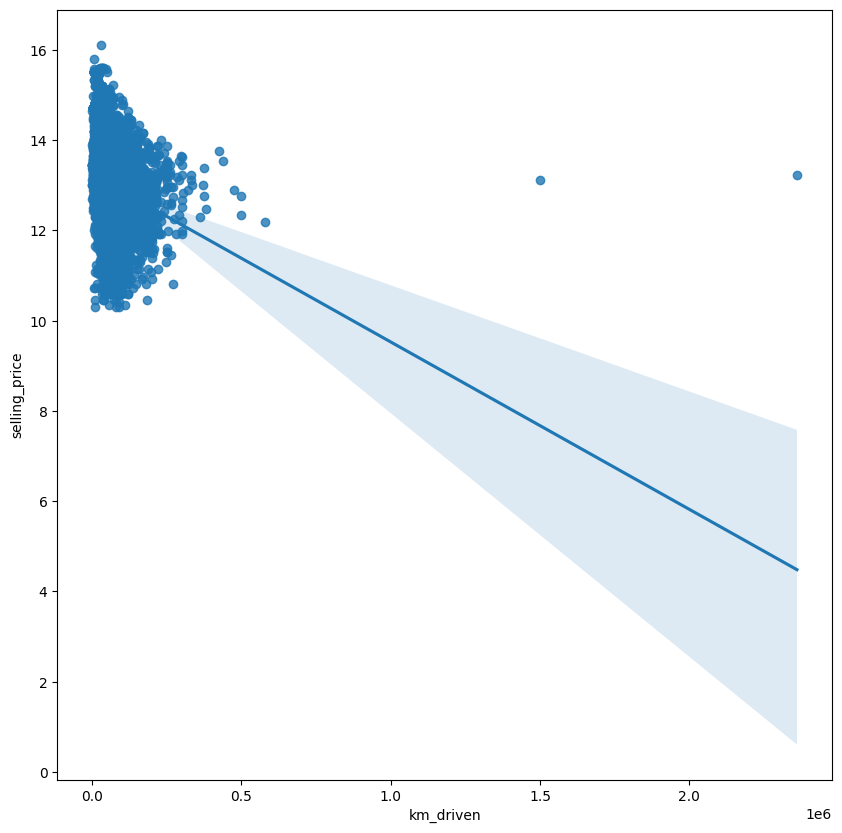

In [71]:
# Create a regplot with a regression line to visualize the relationship between 'km_driven' and 'selling_price'
plt.figure(figsize=(10,10))
sns.regplot(x='km_driven',y='selling_price',data=df_cp)

Similar to what we found earlier, More KMs the car is drived, the more selling_price is decreased

<Axes: xlabel='max_power', ylabel='selling_price'>

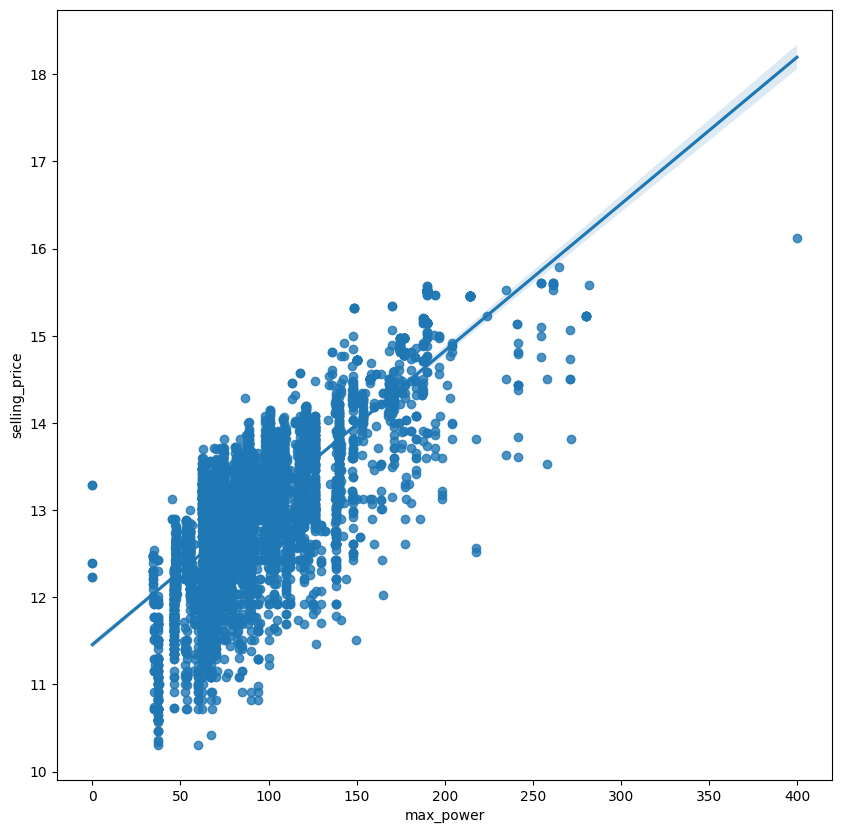

In [72]:
# Create a scatter plot with a regression line to visualize the relationship between 'max_power' and 'selling_price'
plt.figure(figsize=(10,10))
sns.regplot(x='max_power',y='selling_price',data=df_cp)

selling_price increases with the increase of max_power

<Axes: xlabel='engine', ylabel='selling_price'>

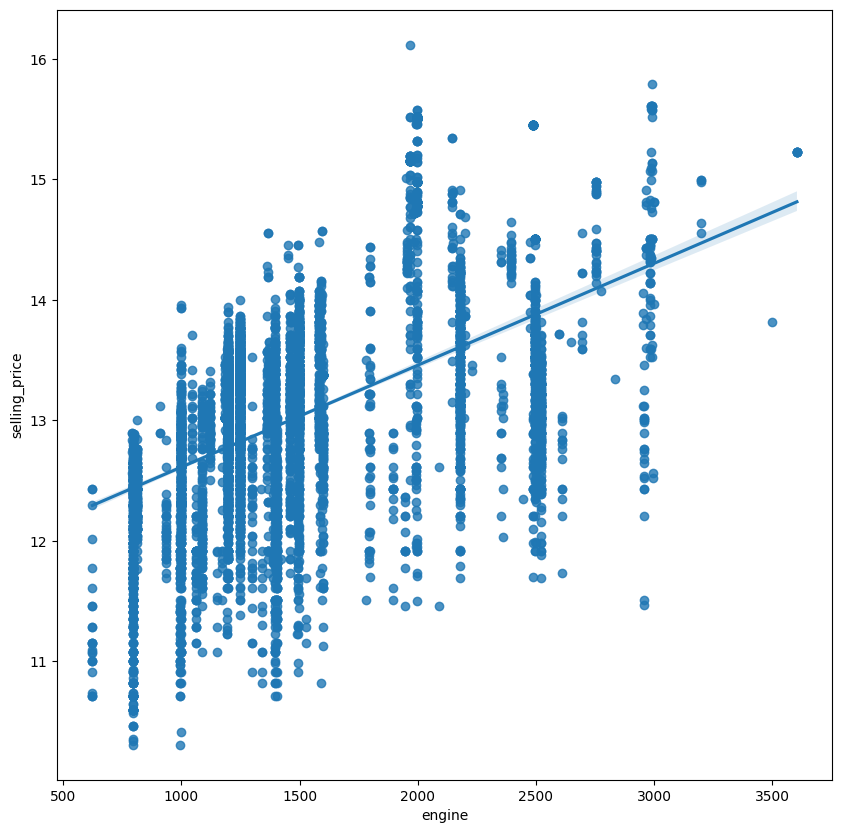

In [73]:
# Create a scatter plot with a regression line to visualize the relationship between 'engine' and 'selling_price'
plt.figure(figsize=(10,10))
sns.regplot(x='engine',y='selling_price',data=df_cp)

selling_price increases with the increase of engine size.

<Axes: xlabel='owner', ylabel='selling_price'>

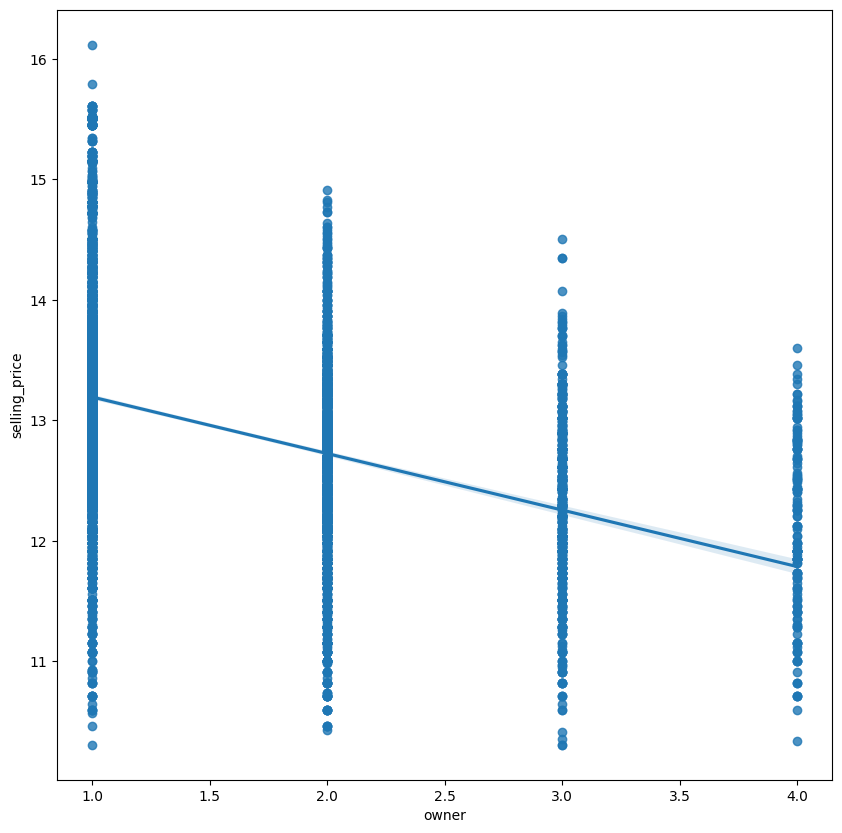

In [74]:
# Create a scatter plot with a regression line to visualize the relationship between 'owner' and 'selling_price'
plt.figure(figsize=(10,10))
sns.regplot(x='owner',y='selling_price',data=df_cp)

As we see previously, as the number of previous car owners increases, its selling_price decreases.

#### Label encoding

Now we would like to change categorical variables to number, since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            8028 non-null   int64  
 1   selling_price  8028 non-null   float64
 2   km_driven      8028 non-null   int64  
 3   fuel           8028 non-null   object 
 4   seller_type    8028 non-null   object 
 5   transmission   8028 non-null   object 
 6   owner          8028 non-null   int64  
 7   mileage        7814 non-null   float64
 8   engine         7814 non-null   float64
 9   max_power      7820 non-null   float64
 10  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1010.7+ KB


#### Categorical Variables Encoding
__Dummy encoding, also known as one-hot encoding, is used to convert categorical variables into a format that can be used in machine learning algorithms. It is often used when dealing with categorical data that cannot be directly used in mathematical models like linear regression or neural networks__
- We implement dummy encoding on categorical columns, since they are all nominal variables:

In [77]:
# List of categorical columns to be one-hot encoded
cat_cols = ['fuel', 'seller_type', 'transmission']
# Use pandas get_dummies to perform one-hot encoding on the specified categorical columns
# Drop_first=True is used to prevent multicollinearity by dropping the first category
df_cp = pd.get_dummies(df_cp, columns=cat_cols, drop_first=True)
# Display the first 5 rows of the modified DataFrame
df_cp.head(5)

age  selling_price  km_driven  owner  mileage  engine  max_power  seats  \
0    7      13.017003     145500      1    23.40  1248.0      74.00    5.0   
1    7      12.821258     120000      2    21.14  1498.0     103.52    5.0   
2   15      11.970350     140000      3    17.70  1497.0      78.00    5.0   
3   11      12.323856     127000      1    23.00  1396.0      90.00    5.0   
4   14      11.775290     120000      1    16.10  1298.0      88.20    5.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            1                       1                             0   
3            0                       1                             0   
4            1                       1                             0   

   transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [78]:
#Check again the correlation
df_cp.corr()

age  selling_price  km_driven     owner  \
age                           1.000000      -0.712151   0.417761  0.513135   
selling_price                -0.712151       1.000000  -0.250714 -0.400123   
km_driven                     0.417761      -0.250714   1.000000  0.290474   
owner                         0.513135      -0.400123   0.290474  1.000000   
mileage                      -0.328817      -0.033074  -0.173733 -0.174818   
engine                       -0.016725       0.516000   0.209019  0.007559   
max_power                    -0.226345       0.729258  -0.036235 -0.110228   
seats                         0.007718       0.187066   0.228646  0.030173   
fuel_Petrol                   0.049176      -0.321905  -0.270750 -0.015134   
seller_type_Individual        0.246700      -0.362525   0.204142  0.223936   
seller_type_Trustmark Dealer -0.102738       0.093023  -0.084538 -0.077423   
transmission_Manual           0.244663      -0.493924   0.200960  0.149047   

                               mileage    engine  max_power     seats  \
age                          -0.328817 -0.016725  -0.226345  0.007718   
selling_price                -0.033074  0.516000   0.729258  0.187066   
km_driven                    -0.173733  0.209019  -0.036235  0.228646   
owner                        -0.174818  0.007559  -0.110228  0.030173   
mileage                       1.000000 -0.578707  -0.372881 -0.454411   
engine                       -0.578707  1.000000   0.701834  0.610481   
max_power                    -0.372881  0.701834   1.000000  0.189248   
seats                        -0.454411  0.610481   0.189248  1.000000   
fuel_Petrol                  -0.069086 -0.503851  -0.298088 -0.352095   
seller_type_Individual        0.008412 -0.128742  -0.280548  0.083137   
seller_type_Trustmark Dealer -0.035549  0.037387   0.025456 -0.029106   
transmission_Manual           0.177860 -0.280823  -0.539233  0.074478   

                              fuel_Petrol  seller_type_Individual  \
age                              0.049176                0.246700   
selling_price                   -0.321905               -0.362525   
km_driven                       -0.270750                0.204142   
owner                           -0.015134                0.223936   
mileage                         -0.069086                0.008412   
engine                          -0.503851               -0.128742   
max_power                       -0.298088               -0.280548   
seats                           -0.352095                0.083137   
fuel_Petrol                      1.000000               -0.003889   
seller_type_Individual          -0.003889                1.000000   
seller_type_Trustmark Dealer     0.141325               -0.386209   
transmission_Manual             -0.029313                0.372892   

                              seller_type_Trustmark Dealer  \
age                                              -0.102738   
selling_price                                     0.093023   
km_driven                                        -0.084538   
owner                                            -0.077423   
mileage                                          -0.035549   
engine                                            0.037387   
max_power                                         0.025456   
seats                                            -0.029106   
fuel_Petrol                                       0.141325   
seller_type_Individual                           -0.386209   
seller_type_Trustmark Dealer                      1.000000   
transmission_Manual                              -0.149513   

                              transmission_Manual  
age                                      0.244663  
selling_price                           -0.493924  
km_driven                                0.200960  
owner                                    0.149047  
mileage                                  0.177860  
engine                                  -0.280823  
m

<Axes: >

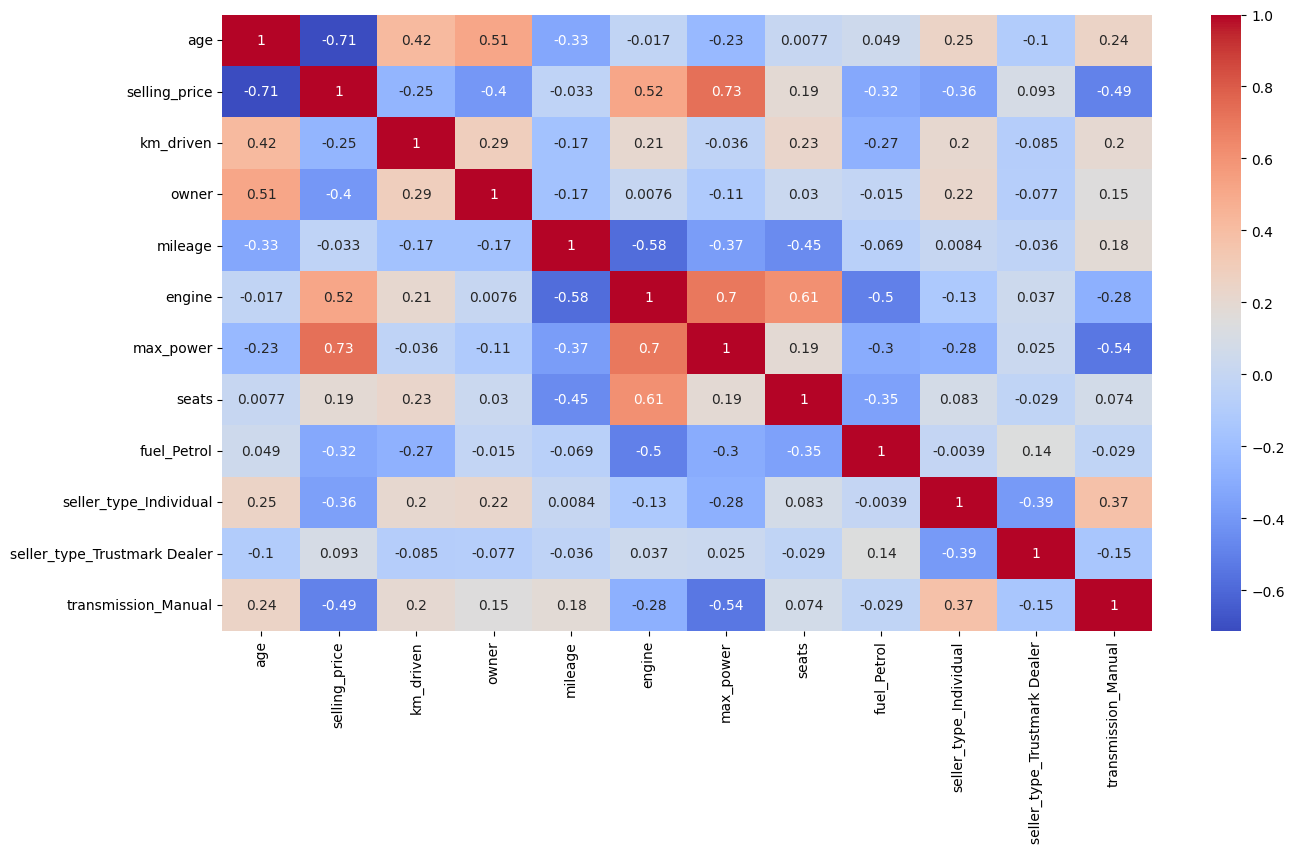

In [79]:
# Let's check out heatmap|
plt.figure(figsize = (15,8))
sns.heatmap(df_cp.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

- 'max_power': There is a strong positive correlation (0.729) between the maximum power of the car's engine and the selling price. More powerful cars tend to have higher selling prices.
- 'engine': There is a nearly strong  correlation (0.516) between the engine's displacement and the selling price. Cars with larger engines tend to have higher selling prices.
- 'age': There is a little higher than moderate negative correlation (-0.712) between the age of the car and its selling price. Newer cars generally have higher selling prices.
- 'transmission_Manual': There is a moderate negative correlation (-0.494) between manual transmission and selling price. Cars with manual transmissions tend to have lower selling prices.
- 'owner': There is a moderate negative correlation (-0.400) between the number of previous owners and the selling price. Cars with more owners tend to have lower selling prices.
- 'seats': There is a weak positive correlation (0.187) between the number of seats and the selling price. Cars with more seats might have slightly higher selling prices.
- 'km_driven', 'mileage', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer': These features show relatively weak correlations with selling price, suggesting that their impact on price is less pronounced.

In [80]:
#Check the description of target variable selling_price
df_cp.selling_price.describe()

count    8028.000000
mean       12.979337
std         0.838039
min        10.308919
25%        12.468437
50%        13.017003
75%        13.429848
max        16.118096
Name: selling_price, dtype: float64

In [81]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           8028 non-null   int64  
 1   selling_price                 8028 non-null   float64
 2   km_driven                     8028 non-null   int64  
 3   owner                         8028 non-null   int64  
 4   mileage                       7814 non-null   float64
 5   engine                        7814 non-null   float64
 6   max_power                     7820 non-null   float64
 7   seats                         7814 non-null   float64
 8   fuel_Petrol                   8028 non-null   uint8  
 9   seller_type_Individual        8028 non-null   uint8  
 10  seller_type_Trustmark Dealer  8028 non-null   uint8  
 11  transmission_Manual           8028 non-null   uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 853.9 KB


In [82]:
df_cp.shape

(8028, 12)

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

In [83]:
import ppscore as pps
# Create a copy of the encoded DataFrame for calculating predictive power scores
dfcopy = df_cp.copy()
dfcopy.head(2)

age  selling_price  km_driven  owner  mileage  engine  max_power  seats  \
0    7      13.017003     145500      1    23.40  1248.0      74.00    5.0   
1    7      12.821258     120000      2    21.14  1498.0     103.52    5.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   

   transmission_Manual  
0                    1  
1                    1

<Axes: xlabel='x', ylabel='y'>

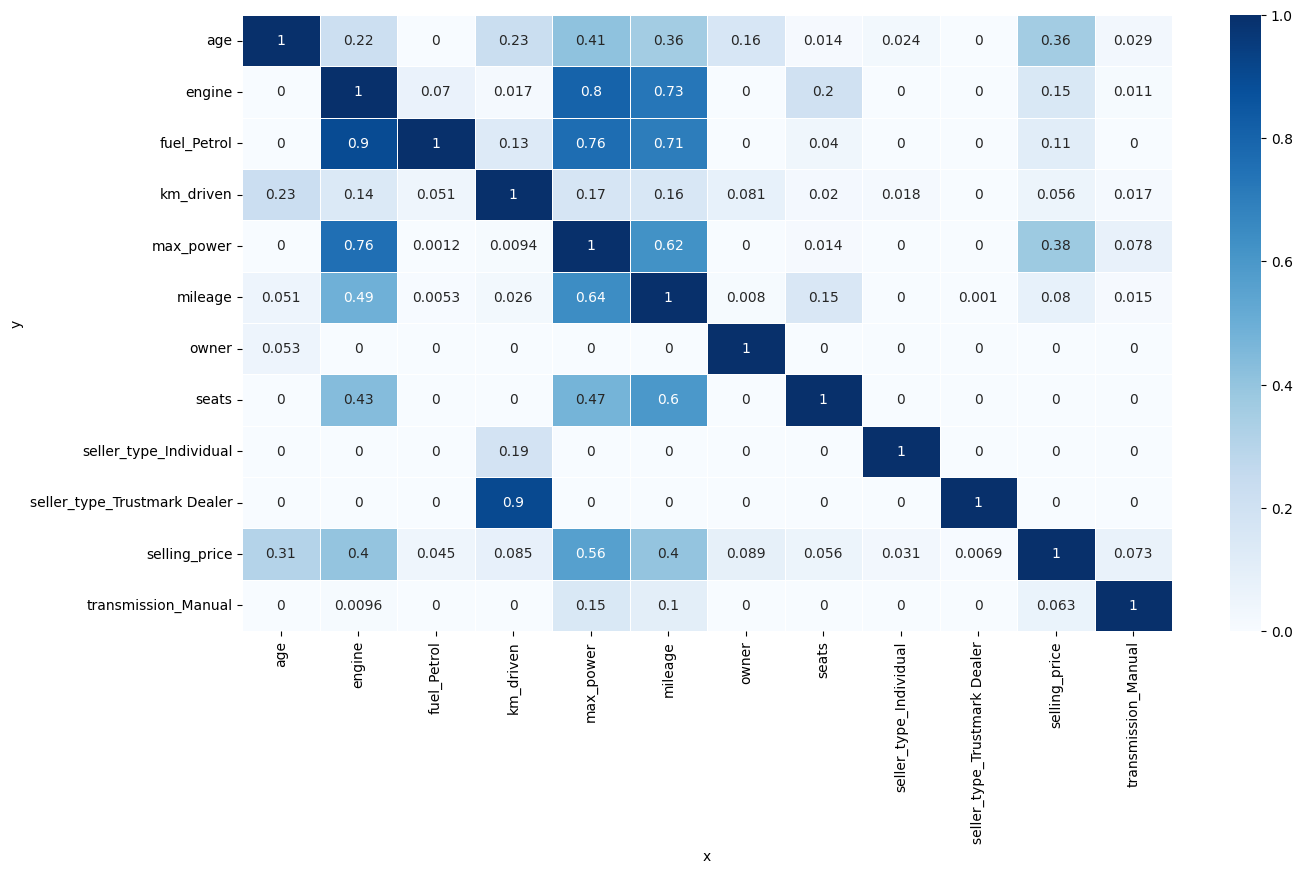

In [84]:
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [85]:
matrix_df

x                                  age    engine  fuel_Petrol  km_driven  \
y                                                                          
age                           1.000000  0.222055     0.000000   0.229023   
engine                        0.000000  1.000000     0.069660   0.017387   
fuel_Petrol                   0.000000  0.895451     1.000000   0.132435   
km_driven                     0.225809  0.141704     0.050530   1.000000   
max_power                     0.000000  0.756933     0.001234   0.009433   
mileage                       0.051472  0.489375     0.005341   0.026304   
owner                         0.053151  0.000000     0.000000   0.000000   
seats                         0.000000  0.434820     0.000000   0.000000   
seller_type_Individual        0.000000  0.000000     0.000000   0.187275   
seller_type_Trustmark Dealer  0.000000  0.000000     0.000000   0.902778   
selling_price                 0.305694  0.400260     0.045359   0.085313   
transmission_Manual           0.000000  0.009604     0.000000   0.000000   

x                             max_power   mileage     owner     seats  \
y                                                                       
age                            0.413778  0.360144  0.161160  0.013814   
engine                         0.802366  0.728124  0.000000  0.202970   
fuel_Petrol                    0.764726  0.705006  0.000000  0.040006   
km_driven                      0.171490  0.159408  0.080614  0.019534   
max_power                      1.000000  0.624556  0.000000  0.014336   
mileage                        0.642448  1.000000  0.007956  0.154664   
owner                          0.000000  0.000000  1.000000  0.000000   
seats                          0.472874  0.596884  0.000000  1.000000   
seller_type_Individual         0.000000  0.000000  0.000000  0.000000   
seller_type_Trustmark Dealer   0.000000  0.000000  0.000000  0.000000   
selling_price                  0.562849  0.398532  0.088934  0.056003   
transmission_Manual            0.150322  0.101875  0.000000  0.000000   

x                             seller_type_Individual  \
y                                                      
age                                         0.024045   
engine                                      0.000000   
fuel_Petrol                                 0.000000   
km_driven                                   0.017607   
max_power                                   0.000000   
mileage                                     0.000000   
owner                                       0.000000   
seats                                       0.000000   
seller_type_Individual                      1.000000   
seller_type_Trustmark Dealer                0.000000   
selling_price                               0.031140   
transmission_Manual                         0.000000   

x                             seller_type_Trustmark Dealer  selling_price  \
y                                                                           
age                                               0.000000       0.360736   
engine                                            0.000000       0.151150   
fuel_Petrol                                       0.000000       0.111415   
km_driven                                         0.000000       0.056304   
max_power                                         0.000000       0.376912   
mileage                                           0.001037       0.080399   
owner                                             0.000000       0.000000   
seats                                             0.000000       0.000000   
seller_type_Individual                            0.000000       0.000000   
seller_type_Trustmark Dealer                      1.000000       0.000000   
selling_price                                     0.006873       1.000000   
transmission_Manual                               0.000000       0.062975   

x                             transmission_Manua

- 'max_power': The feature 'max_power' has a relatively strong predictive power score (0.563) with the 'selling_price'. Higher values of maximum power are indicative of higher selling prices.
- 'engine': The feature 'engine' also has a relatively strong predictive power score (0.400) with the 'selling_price'. Larger engine sizes are associated with higher selling prices.
- 'age': The 'age' of the car has a moderate predictive power score (0.306) with the 'selling_price'. Newer cars tend to have higher selling prices.
- 'mileage': The 'mileage' feature has a moderate predictive power score (0.399) with the 'selling_price'. Cars with better mileage tend to have higher selling prices.
- 'owner', 'fuel_Petrol', 'km_driven', 'transmission_Manual', 'seats', 'seller_type_Individual', 'seller_type_Trustmark Dealer': These features have low predictive power scores, suggesting that their influence on the 'selling_price' might not be very strong or consistent.

## 3. Feature Engineering

In this Selling_price prediction we did not do any feature engineering 

## 4. Feature selection

In [86]:
#Print All the column Names
df_cp.columns

Index(['age', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

We chose the specific features 'km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual' for predicting the 'selling_price' for the following reasons -  

- 'km_driven':
     - The number of kilometers driven by a car can indicate its usage and potential wear and tear.
     - Cars with lower km_driven might be perceived as having more life left and could potentially command higher prices.
     - The feature can capture the relationship between usage and depreciation, impacting selling prices.
- 'age':
     - The age of a car is a direct indicator of its overall condition and longevity.
     - Newer cars generally tend to have higher selling prices compared to older ones.
     - Age is often a key factor in assessing the value of a used car and can strongly influence buyer perception.
     - I discussed with peoples and domain expert in Tokyo those who are engaged in used car selling business. According to them Age of Car is a crucial Fact for deciding the price.
- 'engine':
     - Engine size is a measure of the engine's size and power output.
     - Cars with larger engines might offer better performance, which could influence their selling prices.
     - Engine size can impact the overall driving experience and may attract buyers willing to pay more.
     - I discussed with peoples and domain expert in Tokyo those who are engaged in used car selling business. According to them size of enginer is a must factor to decide the price.
- 'fuel_Petrol':
     - Fuel type can affect operating costs, environmental impact, and buyer preferences.
     - Cars with different fuel types (such as petrol, diesel, or others) might have varying selling prices.
     - The choice of fuel type can influence the target audience and market demand for the car.
- 'transmission_Manual':
     - The type of transmission (manual or automatic) can influence driving experience and convenience.
     - Manual transmissions are often associated with lower initial costs and different driving preferences.
     - The choice of transmission can impact the buyer's willingness to pay, affecting selling prices.


In [87]:
# Define the list of selected features for prediction
feature_list  = ['km_driven','age','engine','fuel_Petrol','transmission_Manual']

In [88]:
# Create the feature matrix X by selecting the specified features
X = df_cp[feature_list]
# Create the target vector y using the 'selling_price' column
y = df_cp['selling_price']

### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [89]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set test_size to 0.3 for a 70-30 train-test split
# Use random_state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 5), (2409, 5), (5619,), (2409,))

In [92]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Training Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Training Dataset Size 2409


In [97]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]

## 5. Preprocessing

### Check Null values

In [98]:
# Check for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [99]:
# Check for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [100]:
# Check for null values in the training target vector y_train
y_train.isna().sum()

0

In [101]:
# Check for null values in the training target vector y_test
y_test.isna().sum()

0

In [102]:
len(feature_list)

5

In [103]:
feature_list

['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual']

__Among the 5 features only 'engine' contains null values__

In [104]:
# Impute the missing values in the 'engine' feature with the mean value for training set
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
# Impute the missing values in the 'engine' feature with the mean value for testing set
X_test['engine'].fillna(X_test['engine'].mean(), inplace=True)

In [105]:
# Check again for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [106]:
# Check again for null values in the selected features of the test set
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [107]:
# Check for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

{'km_driven': 1, 'age': 2, 'engine': 3, 'fuel_Petrol': 4, 'transmission_Manual': 5}


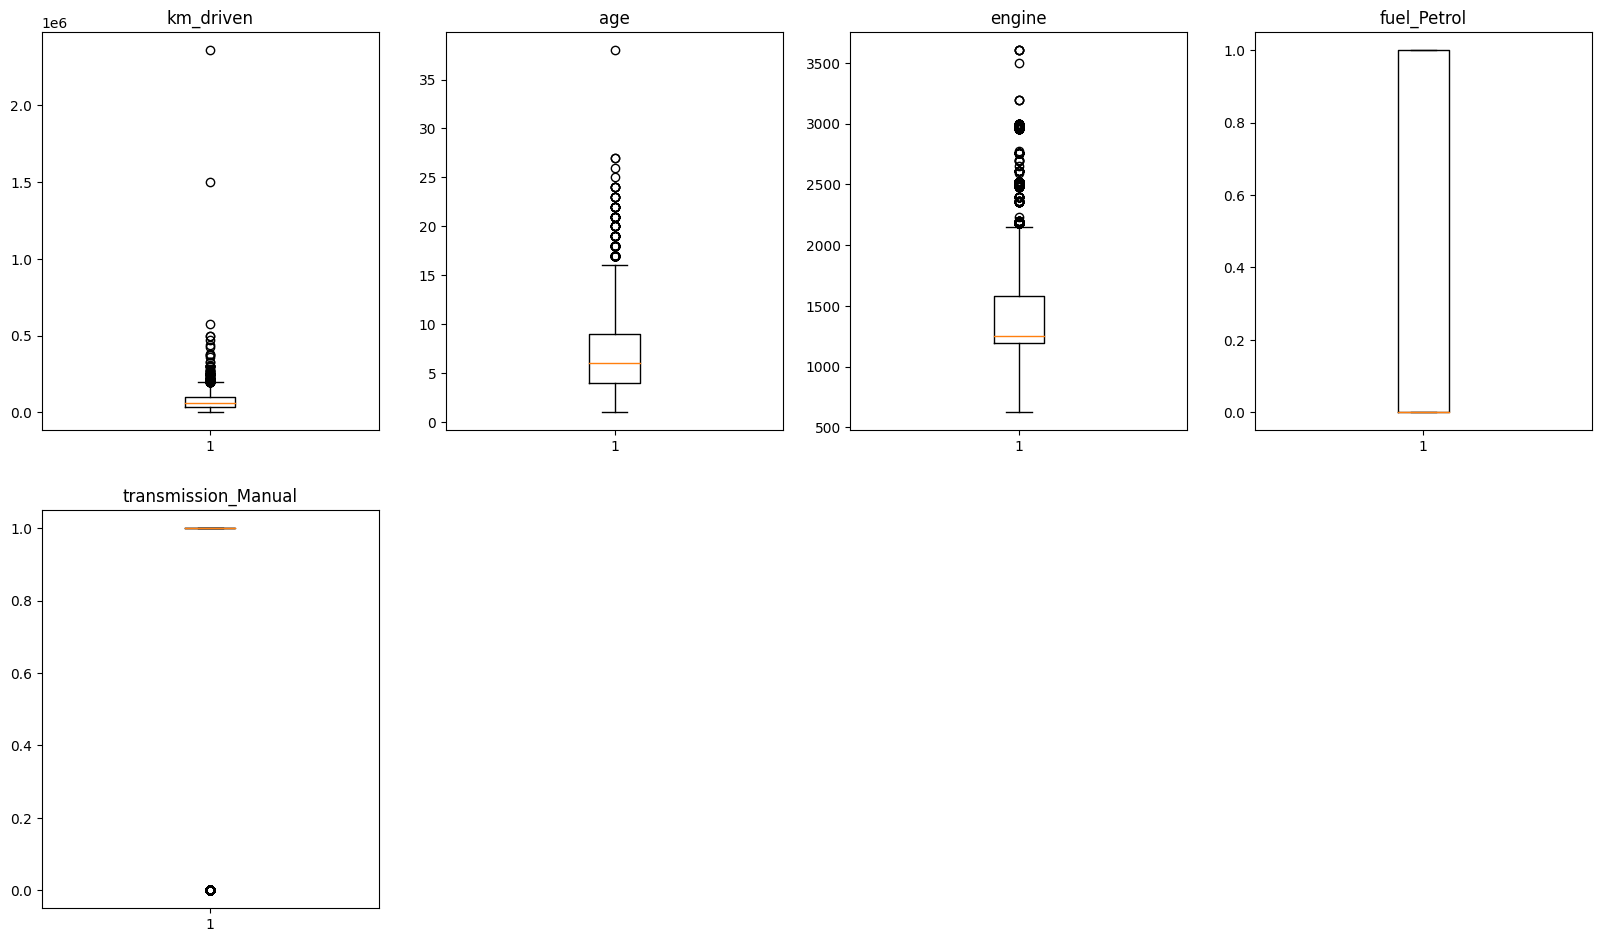

In [108]:
# Create a dictionary of columns.
col_dict = {feature: indx+1 for indx, feature in enumerate(feature_list)}
print(col_dict)

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [109]:
def outlier_count(col, data = X_train):
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    # calculate your inter quatile
    iqr = q75 - q25
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = np.where((data[col] > max_val) | (data[col] < min_val))  # np.where return tuple.

    outlier_count = outlier_count[0] #
    outlier_count = len(outlier_count)

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [110]:
# Iterate through columns of the training feature matrix
for col in X_train.columns:
    print(col)
    # Apply the function 'outlier_count' to the current column
    outlier_count(col)

km_driven

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%
age

---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
engine

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%
fuel_Petrol
transmission_Manual

---------------transmission_Manual---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%


 **Before Scalling we preserve mean of  the input feature (will be used later deployment where user won't input  value of a particular feature )**

In [111]:
max_year = df['year'].max()
mean_age = X_train['age'].mean()
mean_km_driven = X_train['km_driven'].mean()
mean_engine_size = X_train['engine'].mean()
max_year,mean_age, mean_km_driven, mean_engine_size

(2020, 7.137924897668625, 70029.87346502936, 1463.855626715462)

### Scaling

__Feature scaling helps improve reach convergence faster__
- using the StandardScaler from sklearn.preprocessing to standardize the numerical features in the training and testing sets.
- Categorical features are typically represented as binary or one-hot encoded vectors. These representations are already in a consistent format that doesn't have varying magnitudes like numerical features.

In [112]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
feature_list_continuous = ['km_driven', 'age', 'engine']
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the selected numerical features in the training set
X_train[feature_list_continuous] = scaler.fit_transform(X_train[feature_list_continuous])
# Standardize the selected numerical features in the testing set
X_test[feature_list_continuous]  = scaler.transform(X_test[feature_list_continuous])

In [113]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling

Let's define some algorithms and compare them using cross-validation.

[Scikit-Learn](http://scikit-learn.org) provides quick access to a huge pool of machine learning algorithms.

Before using sklearn, there is **one thing you need to know**, i.e., the **data shape that sklearn wants**.

To apply majority of the algorithms, sklearn requires two inputs, i.e., $\mathbf{X}$ and $\mathbf{y}$.

-  $\mathbf{X}$, or the **feature matrix** *typically* has the shape of ``[n_samples, n_features]``
-  $\mathbf{y}$, or the **target/label vector** *typically* has the shape of ``[n_samples, ]`` or ``[n_samples, n_targets]`` depending whether that algorithm supports multiple labels

Note 1:  if you $\mathbf{X}$ has only 1 feature, the shape must be ``[n_samples, 1]`` NOT ``[n_samples, ]``

Note 2:  sklearn supports both numpy and pandas, as long as the shape is right.  For example, if you use pandas, $\mathbf{X}$ would be a dataframe, and $\mathbf{y}$ could be a series or dataframe.

Tips:  it's always better to look at sklearn documentation before applying any algorithm.

__using the Linear Regression model from sklearn.linear_model to make predictions and evaluating its performance using Mean Squared Error (MSE) and R-squared (R2) scores.__

In [405]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
yhat = lr.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
print("MSE: ", mean_squared_error(y_test, yhat))
# Calculate and print the R-squared (R2) score
print("r2: ", r2_score(y_test, yhat))

MSE:  0.14026690457484667
r2:  0.800640237924364


- In above case,
  -  The R2 score of 0.8006 suggests that around 80.06% of the variance in selling prices is explained by the model, which is a reasonably good result. 
  -  The MSE value of 0.1403 indicates that, on average, the squared difference between predicted and actual values is relatively small, further supporting the model's performance.

### Much better: Cross validation + Grid search

__We're importing various regression models from sklearn and preparing a list of these models along with their names for evaluation__|

In [406]:
# Import necessary regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Create a list of regression models for evaluation
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# List of algorithm names for identification
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

__using KFold cross-validation to evaluate the performance of different regression models__

In [407]:
from sklearn.model_selection import KFold, cross_val_score


# Initialize the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True)

# Iterate through each model and perform cross-validation
for i, model in enumerate(algorithms):
    # Perform cross-validation and get negative mean squared error scores
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.13893498 -0.13897602 -0.13866377 -0.16378653 -0.13349586]; Mean: -0.14277143173579837
SVR - Score: [-0.10094058 -0.10134669 -0.09871373 -0.09494469 -0.09772125]; Mean: -0.09873338752291497
KNeighbors Regressor - Score: [-0.09563721 -0.09664265 -0.0924961  -0.10176649 -0.10556217]; Mean: -0.09842092030091303
Decision-Tree Regressor - Score: [-0.1059381  -0.1045562  -0.116302   -0.11865854 -0.11381977]; Mean: -0.11185492107417501
Random-Forest Regressor - Score: [-0.0743206  -0.08095678 -0.07481663 -0.08085187 -0.08297668]; Mean: -0.07878451207095244


- The negative sign is used because- 
    - scikit-learn's cross-validation functions aim to maximize the score, but for error metrics like MSE, lower values are better. 
    - By negating the MSE, the maximization convention is still upheld, and higher (negative) values indicate better performance.

**Based on the above results, the Random Forest Regressor seems to be performing relatively well compared to the other models in terms of the mean negative MSE.**

### Grid Search

__We've initiated a GridSearchCV to find the best hyperparameters for your RandomForestRegressor model.__

In [408]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search through
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': range(100)}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state = 1)

# Initialize GridSearchCV with your defined hyperparameter grid
grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit the GridSearchCV on  training data
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

21085.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21085.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21085.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21085.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21085.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21086.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21086.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21086.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
21086.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [409]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 84}

In [410]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [411]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-0.0724182358841852

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [412]:
# Use the trained GridSearchCV model to make predictions on the test set
yhat = grid.predict(X_test)
# Calculate the mean squared error between the actual target values (y_test) and the predicted values (yhat)
mean_squared_error(y_test, yhat)

0.07036838216503283

In [413]:
def getPrediction(X_test, y_test, start_iloc = 0, end_iloc= 10):

    """
    Make predictions using the trained model and compare with actual values.

    Parameters:
        X_test (DataFrame): Test data features.
        y_test (Series): Actual target values.
        start_iloc (int): Start index for prediction loop.
        end_iloc (int): End index for prediction loop.

    Returns:
        None (Prints predictions and losses for each case).
    """
    
    
    for i in range(start_iloc, end_iloc):
        print("Case No: {}".format(i+1))
        # print(X_test.iloc[i],X_test.iloc[i].shape)
        x = np.array(X_test.iloc[i]).reshape(1,-1)
        # print(x,x.shape)
        pred_selling_price = grid.predict(x) #reshape to predict the invidual sample data

        print("Predicted Selling Price : {: .2f} $".format( np.exp(float(pred_selling_price[0]))))
        print("Acurtal Selling Price   : {: .2f} $".format( np.exp(float(y_test.iloc[i]))))
        pred_selling_price.shape # (1,)
        actual_selling_price = y_test.iloc[i].reshape(1,) # make same shape (1,) 
        actual_selling_price.shape
        print('Loss                     : {: .2f}'.format(mean_squared_error(np.array(actual_selling_price),pred_selling_price)) )

    

In [122]:
start_iloc = 0
end_iloc = 10
getPrediction(X_test, y_test, start_iloc, end_iloc)

Case No: 1
Predicted Selling Price :  208361.39 $
Acurtal Selling Price   :  225000.00 $
Loss                     :  0.01
Case No: 2
Predicted Selling Price :  875562.50 $
Acurtal Selling Price   :  900000.00 $
Loss                     :  0.00
Case No: 3
Predicted Selling Price :  303629.53 $
Acurtal Selling Price   :  320000.00 $
Loss                     :  0.00
Case No: 4
Predicted Selling Price :  415292.16 $
Acurtal Selling Price   :  650000.00 $
Loss                     :  0.20
Case No: 5
Predicted Selling Price :  592864.01 $
Acurtal Selling Price   :  520000.00 $
Loss                     :  0.02
Case No: 6
Predicted Selling Price :  254164.60 $
Acurtal Selling Price   :  170000.00 $
Loss                     :  0.16
Case No: 7
Predicted Selling Price :  316102.98 $
Acurtal Selling Price   :  280000.00 $
Loss                     :  0.01
Case No: 8
Predicted Selling Price :  487322.25 $
Acurtal Selling Price   :  500000.00 $
Loss                     :  0.00
Case No: 9
Predicted Sel

## Analysis:  Feature Importance

__Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.__
__There are several techniques can be mostly applied__ 
- algorithm, 
- permutation,
- shap.  

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [415]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_
print(type(rf))
rf.feature_importances_

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


array([0.03453288, 0.50783079, 0.36664138, 0.00500396, 0.08599098])

feature_importances_ attribute provides information about the importance of each feature in making predictions with the random forest model. Feature importance values are usually calculated based on how much each feature contributes to reducing impurity in the decision trees of the random forest.

Remember that feature importances provide insights into which features are more relevant for making predictions with your model. However, the interpretation of feature importance should be considered alongside domain knowledge and other analysis to make meaningful decisions about feature selection or understanding the model's behavior.

In [416]:
print(X.columns)

Index(['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual'], dtype='object')


<BarContainer object of 5 artists>

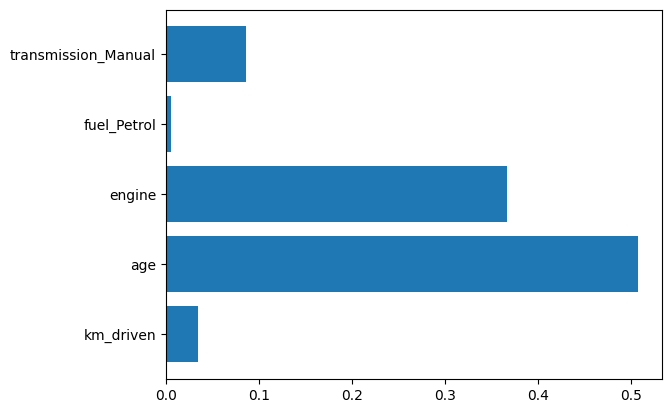

In [417]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

[3 0 4 2 1]
<class 'numpy.ndarray'>


Text(0.5, 0, 'Random Forest Feature Importance')

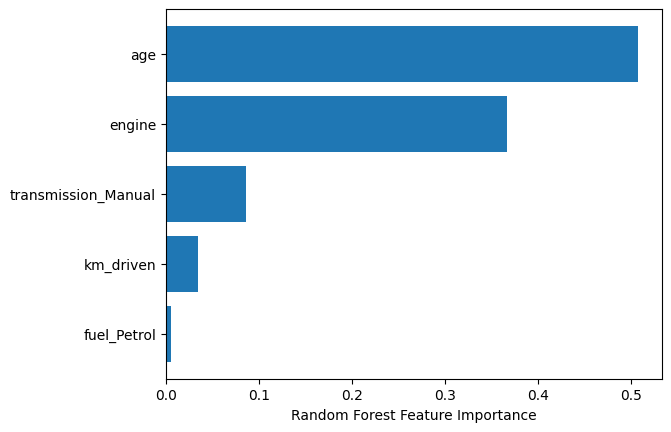

In [419]:
#hmm...let's sort the feature based on their importance 
sorted_idx = rf.feature_importances_.argsort()
print(sorted_idx)
print(type(rf.feature_importances_))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

__a summary of the feature importance based on the provided feature importance values:__

- Age (0.51): The "age" of the car is the most influential feature in predicting the selling price. This suggests that older cars tend to have lower selling prices.

- Engine (0.37): The "engine" feature also holds significant importance. Cars with higher engine specifications are associated with higher selling prices.

- Transmission Type (0.09): The "transmission_Manual" feature has a moderate influence. This indicates that manual transmissions may impact the selling price, although to a lesser extent compared to other features.

- Kilometers Driven (0.03): The "km_driven" feature has a relatively low importance. While it still contributes to the model's predictions, its impact is less significant compared to other features.

- Fuel Type (0.01): The "fuel_Petrol" feature has the lowest importance among the features. This suggests that fuel type might have a minimal impact on the selling price prediction.

**In summary, the "age" and "engine" features are the primary drivers of the model's predictive performance for selling price, followed by transmission type, kilometers driven, and fuel type.**

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

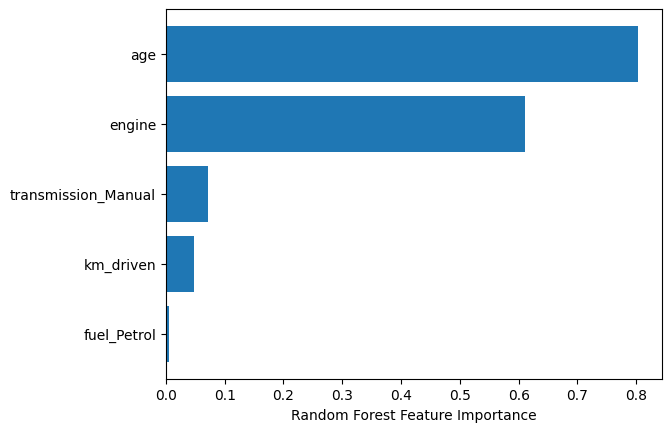

In [420]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances using the trained RandomForestRegressor (rf) on the test data
perm_importance = permutation_importance(rf, X_test, y_test)

# Sort the indices of features based on their mean permutation importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Create a horizontal bar plot to visualize feature importances
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**In permutation feature importance summary, the "age" and "engine" features are still the primary drivers of the model's predictive performance for selling price, followed by transmission type, kilometers driven, and fuel type.**

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [421]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

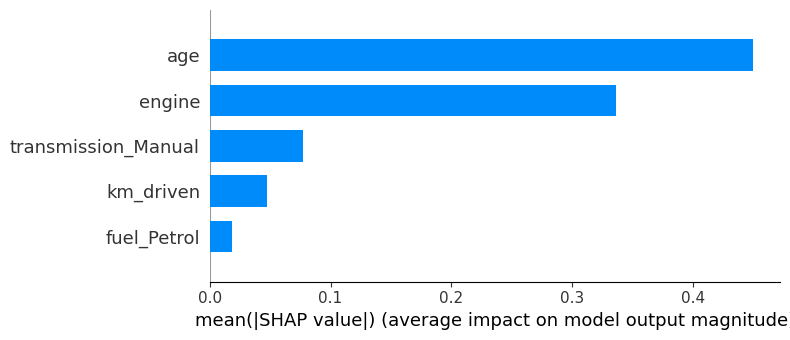

In [422]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

**In SHAP Feature importance summary, the "age" and "engine" features are still the primary drivers of the model's predictive performance for selling price, followed by transmission type, kilometers driven, and fuel type.**

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [7]:
import pickle

# save the model to disk
filename = 'app/code/model/car_prediction_MSE_0.072.model'
pickle.dump(grid, open(filename, 'wb'))

In [8]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [41]:
#let's try to create one prediction
df.iloc[600]

brand                  Tata
year                   2009
selling_price     12.100712
km_driven            120000
fuel                 Diesel
seller_type      Individual
transmission         Manual
owner                     2
mileage                18.8
engine               1248.0
max_power              90.0
seats                   5.0
Name: 605, dtype: object

In [42]:
#prepare the input feature
test_iloc = 600
km_driven = df['km_driven'].iloc[test_iloc]
#calculate the age of the car as we did in training data 
age = df["year"].max()+1 - df["year"].iloc[test_iloc]
engine = df['engine'].iloc[test_iloc]#.split(" ")[0]
fuel_Petrol = 1 if df['fuel'].iloc[test_iloc] == 'Petrol' else 0 # Petrol is 1 and Diseal is 0
transmission_Manual  = 1 if df['transmission'].iloc[1] == 'Manual' else 0
print("KM_driven :{}, Age :{}, Engine :{}, Fuel_Petrol :{}, Transmission_Manual :{}".format(km_driven, age, engine, fuel_Petrol, transmission_Manual))


input_feature = np.array([[km_driven, age, engine, fuel_Petrol, transmission_Manual]])
predict_selling_price = loaded_model.predict(input_feature)[0]

print(f"Predicted Selling Price:",np.exp(predict_selling_price))
print("Actual    Selling Price:",np.exp(df['selling_price'].iloc[test_iloc]))

KM_driven :120000, Age :12, Engine :1248.0, Fuel_Petrol :0, Transmission_Manual :1
Predicted Selling Price: 178611.88094733492
Actual    Selling Price: 179999.99999999997


## Which features are important? Which are not? Why?
__From the feature importance analysis we've conducted, here's a summary of the importance of the features:__

### Important Features:

- Engine: Engine size seems to be a very important feature. This is likely because larger engines often indicate more powerful and potentially more expensive cars.

- Age: The age of the car is also an important predictor. As a car gets older, its value tends to decrease, which aligns with the negative correlation observed earlier.

- Transmission: The type of transmission (manual or automatic) is significant. This could be because manual transmissions are often, which might have lower selling prices.

### Moderate Importance:

- Fuel Type (Fuel_Petrol): The fuel type is moderately important. It could be because the type of fuel can impact the operational cost and efficiency of the vehicle, which in turn affects its value.

- Kilometers Driven (Km_Driven): The distance the car has been driven has a moderate importance. Higher km_driven can indicate more wear and tear, leading to a lower selling price.

### Less Important Features:

- Seats: The number of seats has relatively low importance. While the number of seats can affect a car's value, it might not be a primary factor in predicting selling price compared to other features.


__These rankings align with common intuition about car pricing. Engine size, age, and transmission type are well-known factors affecting car prices. Fuel type and kilometers driven also play a role in pricing, but their impact might be less pronounced__

It's important to note that feature importance can vary depending on the dataset and the specific model used. Additionally, these rankings are based on the Random Forest Regressor's interpretation of the data, and other models might assign different levels of importance to the features.

## Which algorithm performs well? Which does not? Why?

__we analyzed  the performance of the algorithms we tested:__

- Linear Regression: This algorithm has a higher mean squared error compared to the other models. Linear regression assumes a linear relationship between features and the target variable, which might not hold well for complex relationships present in the data. It can struggle when dealing with non-linear patterns.

- SVR (Support Vector Regression): SVR performs better than Linear Regression but not as well as some other models. SVR uses support vector machines to find a hyperplane that best fits the data while considering a margin of tolerance. It might not be capturing the underlying relationships accurately for this specific dataset.

- KNeighbors Regressor: KNeighbors Regressor shows similar performance to SVR. It calculates the target value based on the average of k-nearest neighbors. This algorithm might not be optimal for this dataset due to the high-dimensional nature of the feature space.

- Decision-Tree Regressor: Decision trees tend to overfit the data if they become too deep. While they can capture complex relationships in the data, they can also create over-complex models. This might be the reason for a higher mean squared error compared to the Random-Forest Regressor.

- Random-Forest Regressor: Random forests perform better than the other algorithms. Random forests are ensembles of decision trees, which average out the predictions of multiple trees. They can handle non-linear relationships and interactions between features effectively. The ability of random forests to reduce overfitting compared to a single decision tree likely contributes to their strong performance.

**In summary, the Random-Forest Regressor performs well due to its ensemble nature and its ability to handle complex relationships in the data. The algorithms that perform less well might not be adequately capturing the underlying patterns or could be overfitting due to their model complexity. It's important to understand the characteristics of each algorithm and their suitability for the given problem to choose the best algorithm for predictive modeling.**